<div class="alert alert-info">
Привет, Анастасия! Меня зовут Светлана и я буду проверять твой проект. Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе. Предлагаю общаться на «ты». Но если это не удобно - дай знать, и мы перейдем на «вы».

<div class="alert alert-success">
<b>👍 Успех:</b> Зелёным цветом отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах.
</div>
<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Жёлтым цветом выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).
</div>
<div class="alert alert-danger">
<b>😔 Необходимо исправить:</b> Красным цветом выделены комментарии, без исправления которых, я не смогу принять проект :(
</div>
<div class="alert alert-info">
<b>👂 Совет:</b> Какие-то дополнительные материалы
</div>
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Например, вот так.</div>
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта быстрее.
 </div>

# Анализ товарного ассортимента

### Материалы
<a href="https://public.tableau.com/app/profile/anastasia.efremova/viz/diploma_tableau/Purchases?publish=yes">Дашборд</a> 

<a href="https://disk.yandex.ru/i/dCAUDEc6wvwFyA">Презентация</a> 

В данном проекте поставлена задача по сегментированию товарных групп для целей выявления наиболее перспективных, а также наименее интересных для бизнеса групп которые возможно стоит изъять из ассортимента.

Цель данной работы - повысить конкурентоспособность нашего интернет-магазина "Пока все ещё тут" за счет предложения самых востребованных и высокорентабельных товаров.

План выполнения проекта:
- Знакомство с данными, предобработка, анализ аномалий, подготовка новых столбцов
- Исследователький анализ данных, ответы на вопросы:
1. За какой период предоставлена информация? Визуализация выручки за период.
2. Как много всего уникальных пользователей, заказов, наименований товаров?
3. Какой средний чек по заказам?
- Категоризация товаров (5-7 категорий), анализ по категориям (кол-во и выручка)
- Выделение основного и дополнительного ассортимента, ABC+XYZ анализ
- Проверка статистических гипотез
- Общий вывод и рекомендации


## Предобработка данных

### Знакомство с данными, приведение к нужным форматам

Загрузим необходимые библиотеки

In [1]:
#import all necessary libraries
import pandas as pd
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import re
from nltk.stem import SnowballStemmer
from pymystem3 import Mystem
m = Mystem()
import requests 
import collections
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")

Прочитаем файл для работы с данными и посмотрим первые 5 строк, оценим форматы данных

In [2]:
#open file and read first 5 rows
google_id = "1DkqEQWZoHh22YrsYcNUxSzlhgFqdl0tf"
ecom = pd.read_csv(f"https://drive.google.com/uc?export=download&id={google_id}" )
ecom.head(5)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [3]:
#show info about the file
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


В датасете 6 столбцов:
- `date` — дата заказа. Формат int не подходит, необходимо привести дату к формату datetime
- `customer_id` — идентификатор покупателя. Формат object подходит для этой информации
- `order_id` — идентификатор заказа. Формат int подходит для этой информации
- `product` — наименование товара. Формат object подходит для этой информации
- `quantity` — количество товара в заказе. Формат int подходит для этой информации
- `price` — цена товара. Формат float подходит для этой информации

Приведем дату к нужному формату

In [4]:
#change date format to datetime
ecom['date'] = pd.to_datetime(ecom['date'], format='%Y%m%d%H')
ecom.head(5)

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


<div class="alert alert-success">
<b>👍 Успех:</b> Есть описание задачи, план реализации проекта, импортированы нужные библиотеки, датасет загружен и просмотрен
</div>

### Предобработка данных: поиск пропусков, удаление дубликатов, анализ аномалий

Проверим еще раз данные на пропуски

In [5]:
#check omissions
ecom.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

Пропусков нет, посмотрим на явные дубликаты

In [6]:
#check duplicates
ecom.duplicated().sum()

0

Пока кажется что дубликатов нет, но немного смутило то что дата в формате "год, месяц, день и час" - довольно подробно. Стоит посмотреть дубликаты без даты

In [7]:
#check duplicates without date
ecom.duplicated(subset=['customer_id', 'order_id', 'product', 'quantity', 'price']).sum()

1864

In [8]:
#chow columns with duplicates
ecom[ecom.duplicated(subset=['customer_id', 'order_id', 'product', 'quantity', 'price'],keep=False)].\
            sort_values(by='product').head(10)

,date,customer_id,order_id,product,quantity,price
2021,2019-02-25 15:00:00,075873aa-644c-4a09-9253-204f3156ac7b,70438,"Ёрш унитазный с деревянной ручкой , Ваир 1712012",20,56.0
1999,2019-02-25 09:00:00,075873aa-644c-4a09-9253-204f3156ac7b,70438,"Ёрш унитазный с деревянной ручкой , Ваир 1712012",20,56.0
3256,2019-04-28 17:00:00,cce13789-408b-44e1-8147-3c74dc393bf1,14701,Агератум рассада однолетних цветов в кассете п...,2,210.0
3306,2019-04-29 15:00:00,cce13789-408b-44e1-8147-3c74dc393bf1,14701,Агератум рассада однолетних цветов в кассете п...,2,210.0
4729,2019-06-06 16:00:00,6a86cc77-ef15-496f-b5d3-89005597ee5d,14856,Алиссум Скальный желтый объем 1 л,1,105.0
4754,2019-06-07 08:00:00,6a86cc77-ef15-496f-b5d3-89005597ee5d,14856,Алиссум Скальный желтый объем 1 л,1,105.0
3257,2019-04-28 17:00:00,cce13789-408b-44e1-8147-3c74dc393bf1,14701,Алиссум рассада однолетних цветов в кассете по...,2,210.0
3307,2019-04-29 15:00:00,cce13789-408b-44e1-8147-3c74dc393bf1,14701,Алиссум рассада однолетних цветов в кассете по...,2,210.0
4818,2019-06-07 21:00:00,4723417a-8c73-4502-9600-75187124fb5c,71638,Антинакипин для утюгов Ампулы 10 мл по 5 шт UN...,1,164.0
4817,2019-06-07 17:00:00,4723417a-8c73-4502-9600-75187124fb5c,71638,Антинакипин для утюгов Ампулы 10 мл по 5 шт UN...,1,164.0


Полное дублирование позиции в заказе - иногда в пределах одного дня, иногда в разные дни как в случае с заказом 14701 - это явно сбой в системе. Даже если покупатель решил повторить заказ какой-либо позиции, у него будет отличаться номер заказа, если же взял два одинаковых предмета - то в количестве просто увеличится число.

Посмотрим еще как выглядят числовые данные в дубликатах на гистограммах

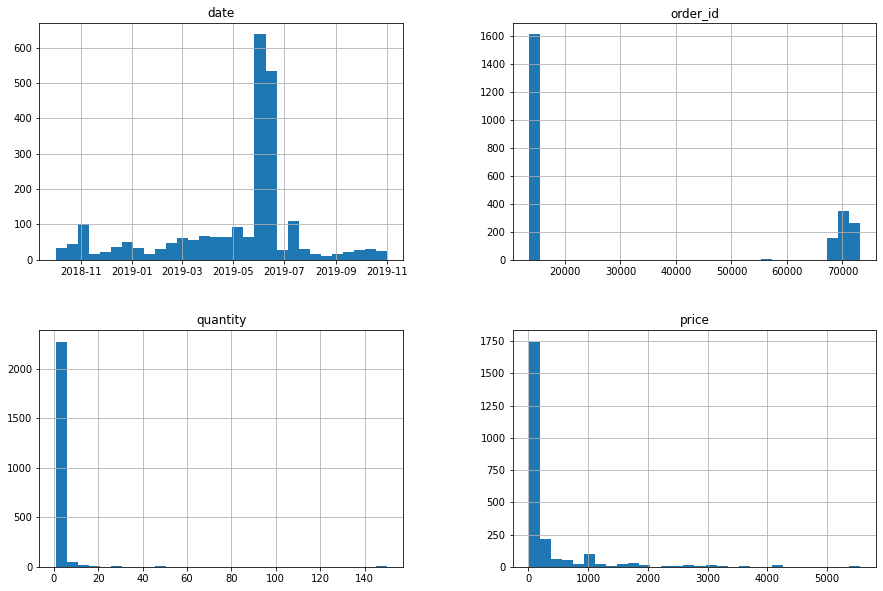

In [9]:
#chow duplicates on histogramms
ecom[ecom.duplicated(subset=['customer_id', 'order_id', 'product', 'quantity', 'price'],keep=False)].\
hist(bins=30,figsize=(15,10))
plt.show()

Судя по всплеску кол-ва дубликатов в июне 2019, видимо что-то происходило именно в этом месяце. Возможно, сбои связаны с перегрузкой сайта в связи с сезонностью, либо было объединение баз и произошло дублирование.

Номера заказов ни о чем не говорят, хотя можно сделать вывод что больше всего в дубликатах заказов начинающихся на 1.

Подавляющее кол-во единиц в дубликатах - единица, но есть несколько позиций которые задублировались и с большим количеством.

Наибольшее кол-во дубликатов с небольшой ценой, 100-300 рублей. Скорее всего это связано с тем, что в принципе цены на товары в нашем магазине не очень высокие.

Удалим вторые по очереди дубликаты и двинемся дальше

In [10]:
#drop duplicates and check they are gone
ecom=ecom.drop_duplicates(subset=['customer_id', 'order_id', 'product', 'quantity', 'price'], keep='first', inplace=False)
ecom.duplicated(subset=['customer_id', 'order_id', 'product', 'quantity', 'price']).sum()

0

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

Посмотрим также, нет ли дублирования в заказах

In [11]:
#check duplicates without order id
ecom.duplicated(subset=['customer_id', 'date', 'product', 'quantity', 'price']).sum()

18

Есть 18 дублей, присмотримся к ним

In [12]:
#chow columns with duplicates
ecom[ecom.duplicated(subset=['customer_id', 'date', 'product', 'quantity', 'price'],keep=False)].\
            sort_values(by='order_id').head(10)

,date,customer_id,order_id,product,quantity,price
1055,2018-12-02 15:00:00,036118cf-c198-48fa-ba15-6d841482a56d,69175,Салатник ВОЛАРЭ БЛЭК 16 см G9403 Luminarc,6,97.0
1056,2018-12-02 15:00:00,036118cf-c198-48fa-ba15-6d841482a56d,69175,Тарелка суповая ВОЛАРЭ БЛЭК 23 см G9402 Luminarc,3,127.0
1057,2018-12-02 15:00:00,036118cf-c198-48fa-ba15-6d841482a56d,69176,Салатник ВОЛАРЭ БЛЭК 16 см G9403 Luminarc,6,97.0
1058,2018-12-02 15:00:00,036118cf-c198-48fa-ba15-6d841482a56d,69176,Тарелка суповая ВОЛАРЭ БЛЭК 23 см G9402 Luminarc,3,127.0
1105,2018-12-04 19:00:00,b2da4ddc-71b5-499b-9806-d59c7a7e6cf5,69207,Чайник электрический ВАСИЛИСА Т33-2000 нержаве...,1,749.0
1106,2018-12-04 19:00:00,b2da4ddc-71b5-499b-9806-d59c7a7e6cf5,69208,Чайник электрический ВАСИЛИСА Т33-2000 нержаве...,1,749.0
1486,2019-01-12 11:00:00,364754b9-56fd-49b5-b6fb-d1fca7ca82f9,69795,Гладильная доска НИКА LORA FASHION HLF 123х46 см,1,1912.0
1487,2019-01-12 11:00:00,364754b9-56fd-49b5-b6fb-d1fca7ca82f9,69796,Гладильная доска НИКА LORA FASHION HLF 123х46 см,1,1912.0
1526,2019-01-16 15:00:00,fb2f95f0-1f30-4e6a-a75c-92d1e2d341e3,69850,"Сушилка для белья на батарею, СБ5-45, НИКА",1,134.0
1527,2019-01-16 15:00:00,fb2f95f0-1f30-4e6a-a75c-92d1e2d341e3,69851,"Сушилка для белья на батарею, СБ5-45, НИКА",1,134.0


Ситуация опять как в первом случае - некоторые заказы одного и того же покупателя с одним и тем же набором товаров повторяются, это откровенный сбой. Удалим вторые по очереди

In [13]:
#drop duplicates and check they are gone
ecom=ecom.drop_duplicates(subset=['customer_id', 'date', 'product', 'quantity', 'price'], keep='first', inplace=False)
ecom.duplicated(subset=['customer_id', 'date', 'product', 'quantity', 'price']).sum()

0

Напоследок, посмотрим есть ли одинаковые номера заказов с разными покупателями (такого быть не должно, все номера заказов должны быть уникальными)

In [14]:
#show order id with several different customers
ecom.groupby('order_id').agg({'customer_id':'nunique'}).reset_index().sort_values(by='customer_id',ascending=False).head(5)

,order_id,customer_id
2595,72845,4
900,69485,3
1903,71480,3
516,68785,2
1063,69833,2


К сожалению, и такие случаи есть - если номер заказа дублируется у разных покупателей, это тоже похоже на системный сбой. Посмотрим что входит в самый первый заказ

In [15]:
ecom.query('order_id == 71480')

,date,customer_id,order_id,product,quantity,price
3963,2019-05-21 02:00:00,4bd9c1e8-b2cc-4ec5-97eb-28d8f3c22d8d,71480,Мята перечная Шоколадная Chocolate d-7 см h-10...,1,74.0
4025,2019-05-24 22:00:00,d8080f8f-3685-433b-b416-beb0a8f06606,71480,Мята перечная Шоколадная Chocolate d-7 см h-10...,1,74.0
4026,2019-05-25 02:00:00,51f04abe-a71a-4694-87b7-ad9ef4930e51,71480,Мята перечная Шоколадная Chocolate d-7 см h-10...,1,74.0


In [16]:
#count duplicates without customer
ecom.duplicated(subset=['order_id', 'product', 'quantity', 'price']).sum()

33

Кроме даты и ID покупателя, все дублируется - однозначно сбой при внесении данных.

Удалим эти дубли и двинемся дальше

In [17]:
#drop duplicates and check they are gone
ecom=ecom.drop_duplicates(subset=['order_id', 'product', 'quantity', 'price'], keep='first', inplace=False)
ecom.duplicated(subset=['order_id', 'product', 'quantity', 'price']).sum()

0

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

Оценим различные аномалии в данных.

Даты будем детальнее смотреть позже, а пока посмотрим есть ли аномалии в количестве заказов, товаров и выбросы по цене.

In [18]:
#prepare table for customer analysis
customers = ecom.groupby('customer_id').agg({'order_id':'nunique','quantity':'sum','price':'sum'}).reset_index()

In [19]:
#show main statistic data about orders, quantities and prices
customers.describe()

,order_id,quantity,price
count,2432.000000,2432.000000,2432.000000
mean,1.442023,5.918586,1209.203159
std,2.687618,27.067050,3161.091973
min,1.000000,1.000000,14.000000
25%,1.000000,1.000000,217.000000
50%,1.000000,2.000000,637.000000
75%,2.000000,3.000000,1460.250000
max,126.000000,1000.000000,133397.000000


Итак, всего в данных представлено 2451 уникальный покупатель.

*Заказы*: среднее кол-во заказов на покупателя - 1,44, то есть большинство покупателей делают 1-2 заказа. Но есть лояльные покупатели, которые совершают и больше заказов, максимум - 126 заказов. Не думаю что это аномалия, просто кто-то очень сильно любит наш магазин!

*Количество*: тут лучше судить по медиане, т.к. среднее кол-во явно сильно "уплыло" из-за максимума в 1000 позиций. По медиане кол-во единиц - 2, и это нормально для розничного онлайн-магазина. Выбросы следует удалить, т.к. крупные оптовики не представляют собой нашу целевую аудиторию и будут искажать результат анализа.

*Цена*: опять же есть интересные экзепляры за 133 тыс руб, но если верить медиане - в среднем товары стоят порядка 637 руб. Интересно посмотреть что это за товары такие дорогие и потом уже принять решение, оставить их или удалить.


Проработаем аномалии с количеством: посмотрим на 10 позиций с самым большим количеством, а также кол-во на 99 персентиле. Затем удалим позиции превышающие 99 персентиль

In [20]:
#show items with max quantity
ecom.sort_values(by='quantity',ascending=False).head(10)

,date,customer_id,order_id,product,quantity,price
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0
3961,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51.0
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200,29.0
568,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,Муляж ЯБЛОКО 9 см красное,170,51.0
212,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,Пружина дверная 240 мм оцинкованная (Д-19 мм) ...,150,38.0
211,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Крепеж для пружины дверной, 1107055",150,19.0
2431,2019-03-23 10:00:00,685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,Плечики пластмассовые Размер 52 - 54 Тула 1205158,150,20.0
586,2018-11-02 11:00:00,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,Муляж ЯБЛОКО 9 см красное,140,59.0
1555,2019-01-21 09:00:00,8eabcaca-e8c8-4eee-9079-4ff5f612273a,69893,Щетка для мытья посуды КОЛИБРИ М5202 большая,100,34.0


In [21]:
#disclose quantity of 99 percentile
np.percentile(ecom['quantity'], 99)

27.0

Покупок с кол-вом более 27 - менее 1 персентиля. Можно смело удалить такие покупки, чтобы не мешали нашему анализу

In [22]:
#drop items with quantity more 27
ecom = ecom[ecom['quantity']<=27]

Теперь посмотрим на цену, по такой же схеме

In [23]:
#show items with max price
ecom.sort_values(by='price',ascending=False).head(10)

,date,customer_id,order_id,product,quantity,price
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400...,1,14917.0
2697,2019-04-05 19:00:00,c0c60544-3a99-49d0-8a8e-cf7f293c22cb,71035,Сумка-тележка хозяйственная Andersen Royal Sho...,1,8737.0
1981,2019-02-24 10:00:00,ac250053-a236-467a-97d2-ddbb9bf4a1ba,70423,Сумка-тележка хозяйственная Andersen Alu Star ...,1,8437.0
2997,2019-04-21 16:00:00,19d904d8-8d16-476d-8f66-b2a3b7a23660,71227,Сумка-тележка хозяйственная Rolser MNB019 rojo...,1,8077.0
7436,2020-01-26 19:00:00,04416514-5346-4f90-93e3-fb7365e2ee8c,109758,Сумка-тележка хозяйственная Rolser MNB019 rojo...,1,8077.0
6629,2019-10-16 15:00:00,d5584388-ffbe-42fd-a746-a98828ec919f,72992,Стремянка 7 ступенчатая Hailo 8040-707 XXL 13 ...,1,7724.0
5994,2019-07-30 01:00:00,e2fe6b48-1955-4882-925c-733f545df026,72140,Сумка-тележка хозяйственная Rolser MNB017 fucs...,1,7679.0
7190,2019-12-31 10:00:00,f279d50f-a508-40b4-bde5-5cb4a1be3ad0,107812,Сумка-тележка хозяйственная Rolser IMX006 bass...,2,7679.0
2339,2019-03-14 18:00:00,27d4ce42-352b-4756-bf5b-8724e05d5131,70740,Сумка-тележка хозяйственная Rolser IMX006 bass...,1,7679.0
654,2018-11-05 22:00:00,fc333417-1d11-4a2a-b946-0957ae0603e9,68872,Сумка-тележка хозяйственная Rolser MOU041 malv...,1,7597.0


In [24]:
#disclose price of 99 percentile
np.percentile(ecom['price'], 99)

5249.0

После удаления нецелевых покупок, исчезла и аномальная цена в 133 тыс. Теперь максимальная цена около 15 тыс рублей выглядит вполне адекватно, тем более что далее цены идут сразу порядка 7,5-8,5 тыс, а цена 99 персентиля - 5249 рублей, то есть не сильно ниже цен в первой десятке. Оставим цены как есть и пойдем дальше.

Напоследок в этом шаге, посмотрим сколько осталось записей после чистки

In [25]:
#show number of rows in df
ecom.shape

(5504, 6)

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Добавление новых столбцов: выручка, месяц, время и день недели продажи

Добавим столбец с выручкой, который показывает общий доход от каждой покупки

In [26]:
#add revenue column
ecom['revenue'] = ecom['quantity']*ecom['price']

Еще добавим столбцы с месяцем продажи

In [27]:
#add month columns
ecom['month'] = (ecom['date']).astype('datetime64[M]')
ecom['year_month'] = ecom['date'].dt.strftime('%Y/%m')

Теперь добавим столбец с днем недели - он будет нужен нам для дальнейшего анализа

In [28]:
#add DOW column
ecom['weekday'] = pd.to_datetime(ecom['date']).dt.day_name()

И наконец - добавим столбец с временем (часом)

In [29]:
#add hour column
ecom['hour'] = pd.DatetimeIndex(ecom['date']).hour

Оценим, что получилось

In [30]:
#show updated dataset
ecom.head(5)

,date,customer_id,order_id,product,quantity,price,revenue,month,year_month,weekday,hour
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10-01,2018/10,Monday,0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,2018-10-01,2018/10,Monday,0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018-10-01,2018/10,Monday,0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,2018-10-01,2018/10,Monday,0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018-10-01,2018/10,Monday,0


Новые столбцы появились, но насколько они корректные? Посмотрим распределение дней недели и часов, чтобы убедиться в их корректности

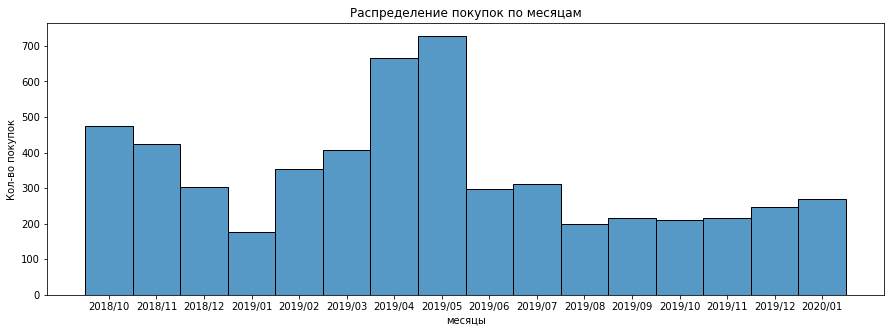

In [31]:
#build histogramm for months
plt.figure(figsize=(15,5))
sns.histplot(data=ecom, x='year_month', bins = 15)
plt.xlabel('месяцы')
plt.ylabel('Кол-во покупок')
plt.title('Распределение покупок по месяцам')
plt.show()

Распределение вполне адекватное. Подъем кол-ва продаж в марте-мае можно связать с началом дачного сезона, а в конце 2018 года - традиционные закупки к новогодним праздникам.

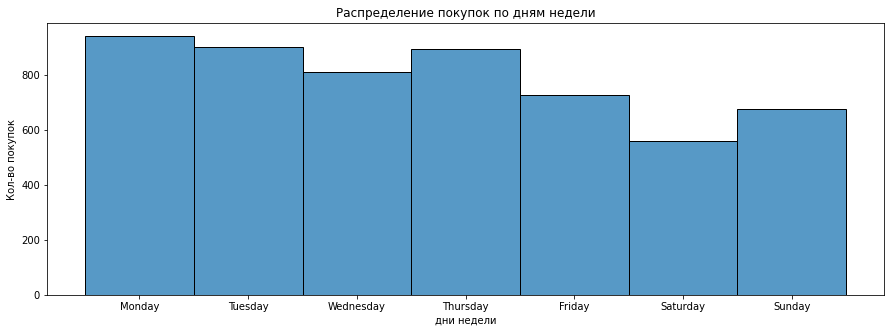

In [32]:
#build histogramm for weekdays and hours
plt.figure(figsize=(15,5))
sns.histplot(data=ecom, x='weekday', bins = 7)
plt.xlabel('дни недели')
plt.ylabel('Кол-во покупок')
plt.title('Распределение покупок по дням недели')
plt.show()

Распределение по дням недели выглядит адекватно - небольшой спад активности к выходным, но в целом равномерно распределены покупки по дням недели.

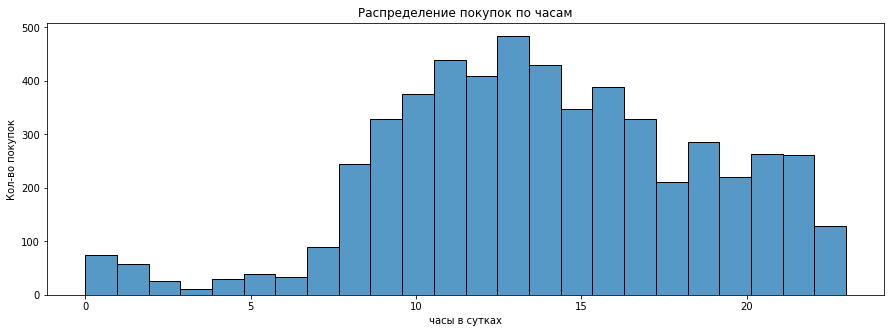

In [33]:
#build histogramm for weekdays and hours
plt.figure(figsize=(15,5))
sns.histplot(data=ecom, x='hour', bins = 24)
plt.xlabel('часы в сутках')
plt.ylabel('Кол-во покупок')
plt.title('Распределение покупок по часам')
plt.show()

По часам также распределение выглядит разумно - ночью с 0 до 7 утра покупок мало, затем активность растет и достигает пика примерно в обеденное время - 12-13 часов. 

### Вывод по части 1

Данные прочитаны, проверены на пропуски и дубликаты. Результат:
- пропусков нет
- дубликаты есть, причем составляют 25% всех записей. Скорее всего они связаны со сбоем в пик сезонных продаж, либо с тем что в июне 2019 года совместили несколько баз и это привело к задвоению записей. Дубликаты удалены.

Заказы, количество и цена проверены на выбросы. Удалены покупки с большим кол-вом (более 27 шт), т.к. это разовые оптовые покупки которые исказят наш анализ. Максимальное кол-во заказов 126, максимальная цена - 14917 руб, оставлены в датасете т.к. не являются аномалиями.

Добавлены строки: выручка, день недели и час. Быстрый анализ по часам продаж и дням недели показал адекватность данных.

После работы с данными, в датасете осталось 5504 записей.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

## Исследовательский анализ данных

Посмотрим на данные поближе: за какой период представлена информация, сколько уникальных товаров и заказов, а также какой средний чек у нашего магазина? На эти вопросы ответим ниже

### Период анализа. Выручка за период

Первым делом, посмотрим за какой период предоставлены данные

In [34]:
#show min and max date
print('Начало периода анализа:', ecom['date'].min())
print('Конец периода анализа:', ecom['date'].max())

Начало периода анализа: 2018-10-01 00:00:00
Конец периода анализа: 2020-01-31 15:00:00


Итак, мы располагаем данными за период с 1 октября 2018 года по 31 января 2020 года, то есть год и 3 месяца

Посмотрим сколько всего выручки получено за этот период и динамику выручки за весь период

In [35]:
#show total revenue for the period
print('Выручка за период составила:', round(ecom['revenue'].sum(),1),'рублей')

Выручка за период составила: 3645962.4 рублей


In [36]:
#group month by revenue
revenue = ecom.groupby('month').agg({'revenue':'sum'}).reset_index()

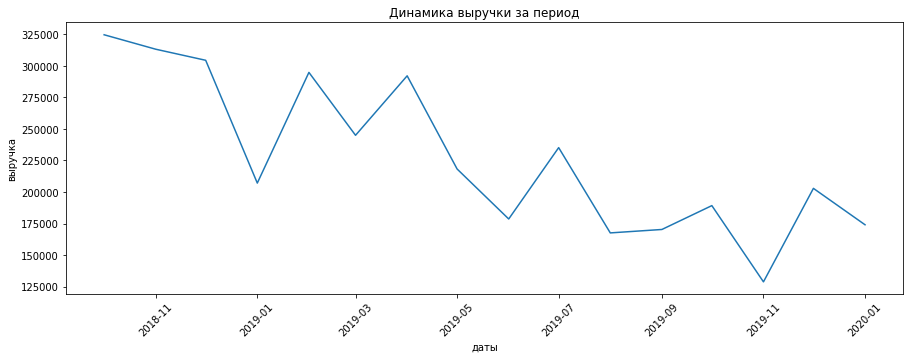

In [37]:
#build line plot for revenue for the period
plt.figure(figsize=(15,5))
sns.lineplot(data=revenue, x='month',y='revenue',palette='Set2')
plt.title('Динамика выручки за период')
plt.xlabel('даты')
plt.ylabel('выручка')
plt.xticks(rotation=45)
plt.show()

Довольно грустная тенденция по выручке - почти весь период она падает, достигая "дна" в ноябре 2019 года, потом незначительно восстанавливается. Но все равно к уровню до середины 2019 года уже не возвращается.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Исследование уникальных пользователей, заказов, наименований товаров

Посмотрим на количество уникальных покупателей, заказов и наименований товаров

In [38]:
#show number of unique purchasers
print('Количество уникальных покупателей:', ecom['customer_id'].nunique())
print('Количество уникальных заказов:', ecom['order_id'].nunique())
print('Количество уникальных наименований товаров:', ecom['product'].nunique())

Количество уникальных покупателей: 2389
Количество уникальных заказов: 3455
Количество уникальных наименований товаров: 2325


Больше всего интересует последняя строчка: 2325 различных товаров, из которых нам предстоит выделить категории чтобы как-то с ними работать

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Средний чек по заказам. Анализ в динамике

Посчитаем средний чек. Для этого сгруппируем данные по заказам и посмотрим среднюю выручку по ним, в разрезе месяцев

In [39]:
#create table with average cheque in dynamics
months = ecom.groupby(['year_month','order_id']).agg({'revenue':'sum'}).reset_index()
avg_cheque = months.groupby('year_month').agg({'revenue':'mean'}).reset_index()
avg_cheque

,year_month,revenue
0,2018/10,1399.258621
1,2018/11,1550.346535
2,2018/12,1102.884058
3,2019/01,1294.237500
4,2019/02,1045.397163
5,2019/03,1008.037037
6,2019/04,1136.501946
7,2019/05,1226.073034
8,2019/06,1123.415094
9,2019/07,1187.732323


Средний чек колеблется от 594 до 1550 руб.

Посмотрим на динамику среднего чека на графике

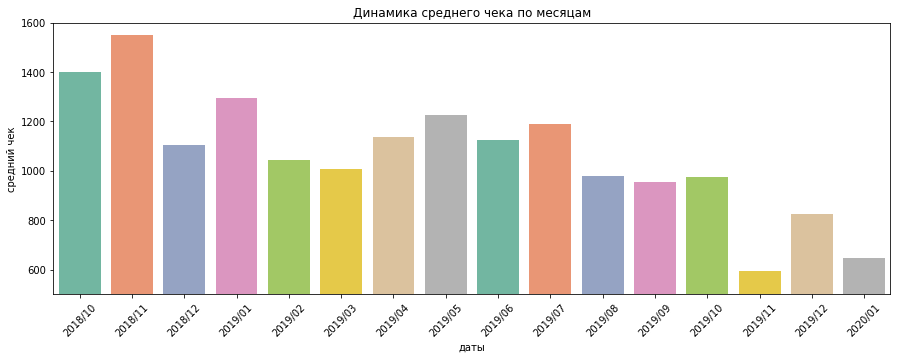

In [40]:
#build line plot for avg cheque by months
plt.figure(figsize=(15,5))
sns.barplot(data=avg_cheque, x='year_month',y='revenue',palette='Set2')
plt.title('Динамика среднего чека по месяцам')
plt.xlabel('даты')
plt.ylabel('средний чек')
plt.ylim(500,1600)
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-warning">
<s><b>🤔 Рекомендация:</b> Даты лучше привести к формату без времени, так график будет выглядеть аккуратней</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Поправила).</div>

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

Самый высокий средний чек - в ноябре 2018, а самый низкий - в ноябре 2019.

Видимо, это связано с особенностями ассортимента, в которых будем разбираться далее.

Дополнительно, посмотрим на помесячную динамику среднего кол-ва заказов на покупателя - это косвенно показывает, насколько менялась лояльность покупателей магазину

In [41]:
#show dynamics of number of orders per customer
av_orders = ecom.groupby('year_month').agg({'order_id':'nunique','customer_id':'nunique'}).reset_index()
av_orders['av_order'] = av_orders['order_id'] / av_orders['customer_id']
av_orders

,year_month,order_id,customer_id,av_order
0,2018/10,232,176,1.318182
1,2018/11,202,176,1.147727
2,2018/12,276,228,1.210526
3,2019/01,160,146,1.095890
4,2019/02,282,241,1.170124
5,2019/03,243,228,1.065789
6,2019/04,257,235,1.093617
7,2019/05,178,164,1.085366
8,2019/06,159,150,1.060000
9,2019/07,198,186,1.064516


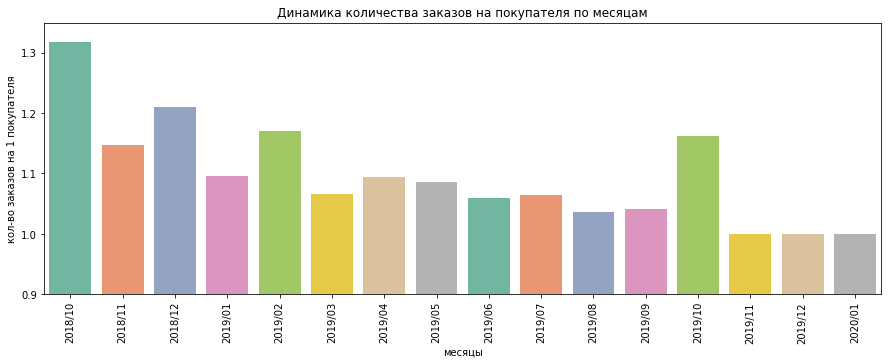

In [42]:
#build line plot for avg cheque by months
plt.figure(figsize=(15,5))
sns.barplot(data=av_orders, x='year_month',y='av_order',palette='Set2')
plt.title('Динамика количества заказов на покупателя по месяцам')
plt.xlabel('месяцы')
plt.ylabel('кол-во заказов на 1 покупателя')
plt.ylim(0.9,1.35)
plt.xticks(rotation=90)
plt.show()

Динамика опять неутешительная - если в начале периода количество заказов на покупателя было стабильно более 1, то с ноября 2019 оно опустилось до 1 заказа - то есть последние три месяца покупатели приходили лишь за 1 покупкой и более в течение месяца не делали заказов. Это может быть связано с сезонностью (не дачный сезон), но в 2018 году в это время было много повторных заказов, так что явно что-то изменилось в худшую сторону.

Почему покупатели перестали приходить повторно? Возможно, стало хуже качество товаров, или услуги после оплаты - плохая доставка, отсутствие поддержки (например, если возникает вопрос по товару), что-то еще. Необходимо понять, что произошло в магазине в конце 2019 года. Были ли существенные изменения в логистике, товарах, политике магазина?

### Вывод по части 2

В результате исследовательского анализа выяснили что:

- исследуемый период: с 1 октября 2018 года по 31 января 2020 года, то есть год и 3 месяца
- выручка за период составила 3,6 млн рублей, распределена равномерно с одним скачком в мае 2019 года
- в датасете 2,4 тыс уникальных покупателей, 3,4 тыс уникальных заказов и 2325 различных товаров
- средний чек по заказам колеблется от 594 до 1550 руб в зависимости от месяца; самый высокий средний чек - в ноябре 2018, самый низкий - в ноябре 2019.
- среднее количество заказов на покупателя падало в течение периода, был всплеск в октябре 2019, но потом все оставшиеся месяцы кол-во заказов на одного покупателя было 1

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

## Категоризация товаров. Анализ по категориям

Теперь приступим к делению товаров на категории.

Для начала, посмотрим на наиболее популярные товары: топ-30

In [43]:
#show 30 most popular goods
ecom['product'].value_counts().head(30)

Пеларгония розебудная Red Pandora укорененный черенок                                                      66
Пеларгония розебудная Prins Nikolai укорененный черенок                                                    56
Пеларгония зональная диам. 12 см сиреневый полумахровый                                                    53
Сумка-тележка 2-х колесная Gimi Argo синяя                                                                 45
Пеларгония розебудная Mary укорененный черенок                                                             40
Пеларгония розебудная Margaretha укорененный черенок                                                       31
Пеларгония розебудная Queen Ingrid укорененный черенок                                                     31
Пеларгония зональная махровая лососевая                                                                    25
Пеларгония зональная Ринго Вайт d-7 см h-10 см укорененный черенок                                         25
Пеларгония

Пока что молжно сделать вывод, что мы продаем очень много разных пеларгоний. Но кроме них, немало продается тележек и сушилок, а также муляжи баклажанов. Следующим этапом выделим основные категории, на которые можно разделить все товары магазина

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Выделение 5-7 категорий товаров

Создадим новый столбец для выделения категорий товаров. Сохраним в нем первые 2 слова из наименований товаров, т.к. как правило по этим словам можно сделать вывод о том что это за товар.

In [44]:
#add new column and insert first 2 words of product name in it
ecom['product'] = ecom['product'].str.lower()
ecom['two_words'] = ecom['product'].apply(lambda x: ' '.join(x.split()[:2]))
ecom.head(5)

,date,customer_id,order_id,product,quantity,price,revenue,month,year_month,weekday,hour,two_words
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,2018-10-01,2018/10,Monday,0,комнатное растение
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,2018-10-01,2018/10,Monday,0,комнатное растение
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,2018-10-01,2018/10,Monday,0,радермахера d-12
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,2018-10-01,2018/10,Monday,0,хризолидокарпус лутесценс
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,2018-10-01,2018/10,Monday,0,циперус зумула


Приведем наименования из 2 первых слов к нижнему регистру и посмотрим на наиболее популярные топ-50

In [45]:
#show 50 most popular goods
ecom['two_words'] = ecom['two_words']
ecom['two_words'].value_counts().head(50)

пеларгония зональная           389
сушилка для                    296
пеларгония розебудная          255
рассада зелени                 236
томата (помидор)               168
гладильная доска               136
сумка-тележка хозяйственная    134
герань домашняя                112
чехол для                       98
сумка-тележка 2-х               96
тележка багажная                88
штора для                       77
таз пластмассовый               77
однолетнее растение             69
рассада капусты                 67
искусственный цветок            59
коврик придверный               50
роза садовая                    46
рассада арбуза                  42
бакопа ампельная                41
пеларгония toscana              40
цветок искусственный            39
петуния махровая                39
корзина для                     33
рассада огурца                  31
рассада кабачка                 30
полки qwerty                    27
подвесное кашпо                 27
рассада дыни        

Посмотрим сколько теперь уникальных наименований, с учетом первых двух слов и приведения к нижнему регистру

In [46]:
ecom['two_words'].nunique()

919

Очевидно что в списке много комнатных растений. Спарсим каталог растений с сайта obi.ru

In [47]:
#there are 22 pages of home flowers in Obi
page_counts = 22
URL = 'https://obi.ru/sad-i-dosug/rastenija-i-semena/komnatnye-rastenija?page='     
homeflowers = []
for i in range(1, 1 + page_counts):  
    req = requests.get(URL + f'{i}').text    
    floweritems = re.findall('Растение[^\d]+', req)
    homeflowers.append(floweritems)
homeflowers

[['Растение Фаленопсис D',
  'Растение Фаленопсис D',
  'Растение Фаленопсис ',
  'Растение Фаленопсис ',
  'Растение Фаленопсис ',
  'Растение Фаленопсис ',
  'Растение Орхидея Цимбидиум D',
  'Растение Орхидея Цимбидиум D',
  'Растение роза гибридная микс"/></picture></figure></div><div class="_',
  'Растение роза гибридная микс</p><div class="_',
  'Растение Кактус № ',
  'Растение Кактус № ',
  'Растение Кактус мамиллярия микс D',
  'Растение Кактус мамиллярия микс D',
  'Растение Антуриум Андрианум ',
  'Растение Антуриум Андрианум ',
  'Растение Антуриум Андреанум ',
  'Растение Антуриум Андреанум ',
  'Растение Антуриум ред чемпио н D',
  'Растение Антуриум ред чемпио н D',
  'Растение Антуриум андреанум микс D',
  'Растение Антуриум андреанум микс D',
  'Растение Фаленопсис ',
  'Растение Фаленопсис ',
  'Растение Кактус гимнокалиц иум микс D',
  'Растение Кактус гимнокалиц иум микс D',
  'Растение Эхмея фасциата примера D',
  'Растение Эхмея фасциата примера D',
  'Растение Сп

In [48]:
#lets change list of lists to list
home_flowers = [x for l in homeflowers for x in l]
home_flowers = [item.lower().split(' ', )[1] for item in home_flowers]
home_flowers = [item for item, count in collections.Counter(home_flowers).items() if count > 1]
home_flowers = list(set(home_flowers))
home_flowers

['плектрантус',
 'примула',
 'хризантема',
 'нефролепис',
 'пряно-ароматическое',
 'камбрия',
 'эхино',
 'циссус',
 'кодиеум',
 'ампельное',
 'эсхинантус',
 'спатифиллум',
 'перец',
 'тюльпан',
 'вриезия',
 'бегония',
 'сансевиерия',
 'хлорофитум',
 'нематантус',
 'нолина',
 'первоцвет',
 'эхинокактус',
 'шлюмбергера',
 'пахира',
 'асплениум',
 'пеларгония',
 'орегано',
 'плант',
 'гербера',
 'платицериум',
 'сурфиния',
 'гиацинт',
 'шеффлера',
 'кордилина',
 'фаленопсис',
 'маранта',
 'суккулент',
 'мединилла',
 'ховея',
 'опунция',
 'орхидный',
 'орхидея',
 'крассула',
 'ардизия',
 'гузмания',
 'каллизия',
 'ктенанта',
 'арека',
 'антуриум',
 'монстера',
 'гиппеаструм',
 'традесканция',
 'филодендрон',
 'аглаонема',
 'алоэ',
 'лилия',
 'литопс',
 'каланхоэ',
 'сциндапсус',
 'рипсалис',
 'мильтония',
 'калатея',
 'гимнокалициум',
 'аспидистра',
 'конфетти',
 'эхеверия',
 'мюленбекия',
 'нарцисс',
 'солянум',
 'алое',
 'пафиопедилюм',
 'аспарагус',
 'хамедорея',
 'кофе',
 'флокс',
 'ни

С учетом списка самых популярных товаров (первые 2 слова) и списка с сайта obi, составим каталог списков товаров по категориям

In [49]:
cat_dictionary = {
    'мелкий ремонт':['сверло','штангенциркуль','основание','петля','сварка','фал','шпагат','инструмент','линейка','шило',\
                    'измерительный'],
    'комнатные растения': ['пеларгония','герань','флокс','комнатное растение','кактус','эхмея', 'фаленопсис', \
                           'пряно-ароматическое','гербера', 'роза', 'антуриум', 'орхидея', 'спатифиллум',  'суккулент',\
                          'литопс', 'цикламен', 'радермахера', 'хризолидокарпус', 'циперус', 'шеффлера', 'юкка'\
                          'декабрист', 'шеффлера','цветок','пеперомия','нефролепис','сциндапсус','эхинокактус',\
                          'антуриум','молодило','хлорофитум','фикус','спатифиллум','гимнокалициум','многолетнее',\
                          'фиалка','хамедорея','цитрофортунелла','муррайя','каланхое','фаленопсис','алоэ','кампанула',\
                          'замиокулькас','диффенбахия','эхеверия','фуксия','пуансеттия','хризолидокарпус','альбука',\
                          'драцена','капсикум','эпипремнум','кофе','калла','глоксиния','юкка','декабрист','пахира','мединилла',\
                          'калатея','афеляндра','адиантум','крассула','нолина','аспарагус','фатсия','каллуна','фиттония',\
                          'соланум','комнатное растение','цветущее комнатное','кодонанта','радермахера','амариллис'],
    'садовые растения': ['рассада','помидор','садовая','бакопа','петуния','дыня','мелисса','кореопсис'\
                        'чабер', 'душица','сантолина','целозия','тимьян','хризантема','анемона'\
                        'физостегия','змееголовник','бегония','розмарин','лаватера','дендробиум','бальзамин',\
                        'лилейник','гиностемма','цинерария','настурция','осина','кабачок','эхинацея','маттиола',
                        'примула','укроп','цикламен','бархатцы','сельдерей','калибрахоа','патиссон','горох',\
                        'седум','подсолнечник','тагетис','вероника','вербейник','иссоп','огурец','алиссум','энотера',\
                        'ранункулус','базилик','космея','портулак','кипарисовик','валериана','гайлардия','шалфей',\
                        'астра','импатиенс','тюльпан','лаванда','мята','лапчатка','клубника','капуста','кориандр',\
                        'лук','эвкалипт','солидаго','мимоза','гиацинт','пуансетия','клен','вербена','незабудка','скиммия',\
                        'пиретрум','лобелия','тыква','крокус','арбуз','эшшольция','лен','гвоздика','щетка','однолетнее',\
                        'цинния','хоста','виноград','перчатки','петрушка','камнеломка','нивянник','георгина','кореопсис',\
                        'аптения','лавр','годеция','овсянница','рудбекия','виола','монарда','платикодон','котовник','салат',\
                        'гортензия','травы','азалия','мирт','джункус','буддлея','лантана','бадан','любисток','артемизия',\
                        'колокольчик','ясколка','аквилегия','анемона','физостегия','барвинок','гардения','гипсофила','чабер',\
                        'земляника','морковь','львиный зев','смолевка','папоротник','мускари','бузульник','вигна','ель канадская'],
    'товары для дома и уюта':  ['этажерка','подставка','сушилка','гладильная','чехол','таз','штора','искусственный цветок',\
                                'коврик','ковёр','корзина','полки','кашпо','контейнер','ёрш','ерш', 'новогоднее дерево','подкладка','таз','вантуз'\
                               'ящик','блюдо','вешалка','плечики','ваза','ведро','обувница','тряпка','плед','светильник',\
                               'ароматизированное','скатерть','полотенце','лоток','короб','веник','насадка','наматрасник',\
                               'полка','наволочка','халат','томат','ванна','подушка','одеяло','пододеяльник','прищепки',\
                               'совок','штора','карниз','корзинка','табурет','стремянка','швабра','фоторамка','щётка',\
                               'бак','кофр','термометр','сетка','простыня','подголовник','урна','окномойка',\
                               'вешалок','уголок','завертка','крепеж','фиксатор','наматрацник','комплект','набор','стяжка',\
                               'ткань','сметка','искусственный лист','вешалки','корыто','ящик','кольца','стеллаж',\
                               'сиденье','ковер','пылесос','рукав','покрытие','стремянки','пуф','комод','штанга','утюг',\
                               'стяжки','картина','фен','вантуз','скребок','отжим','мешок','ролик','пробка','губка',\
                               'сменный блок','складная картонная','складной детский','решетка','ручка-скоба','держатель',\
                               'простынь','ручка','двуспальное'],
    'сумки и тележки': ['сумка','тележка','Сумка-тележка','искусственная','покрывало','мыльница','крючок','композиция'],
    'бытовая химия':['увлажняющая','концентрат','чистящий','отбеливатель','мыло','пена','средство','паста','соль','бальзам'\
                    'биопорошок','бальзам','кондиционер','гипоаллергенный','биопорошок','ополаскиватель'],
    'посуда и кухонная утварь': ['салатник','рыбочистка','овощечистка', 'кружка', 'банка', 'блюдо', 'скатерть', 'свч', 'нож',\
                       'тортница', 'кастрюля', 'бокал', 'сахарница', 'терка', 'тарелка','муляж','антижир','сервировочная',\
                              'шнур', 'пьезозажигалка','антинакипин','разделочная','масленка','стакан','термостакан','емкость',
                                'скалка','блюдце','мантоварка','сотейник','чайник','tepмокружка','картофелемялка','чайный',\
                                'доска','котел','ковш','толкушка','ножеточка','кипятильник','соковыжималка','противень',\
                                'сковорода','орехоколка','бидон','электроштопор','банка','миска','сито','салфетница',\
                                 'бульонница','шприц','венчик','весы','кувшин','соковарка','вилка','половник','крышка','дозатор',\
                                'миксер','ложка','салфетки','салфетка','пакет','вкладыши','бензин','хлебница','термос',\
                                 'овощеварка','форма','пресс','лопатка','кисточка','модульная стеклянная','защитный экран',\
                                'измельчитель','рассекатель','просеиватель','отделитель']
}

Напишем формулу для формирования категорий

In [50]:
#let's create function categorize_product()
def categorize_product(row):
    for key,value in cat_dictionary.items():
        for item in value:
            if item in row:
                return key
            
    return 'прочее'

In [51]:
ecom['product_category'] = ecom['two_words'].apply(categorize_product)
ecom.head(5)

,date,customer_id,order_id,product,quantity,price,revenue,month,year_month,weekday,hour,two_words,product_category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,2018-10-01,2018/10,Monday,0,комнатное растение,комнатные растения
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,2018-10-01,2018/10,Monday,0,комнатное растение,комнатные растения
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,2018-10-01,2018/10,Monday,0,радермахера d-12,комнатные растения
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,2018-10-01,2018/10,Monday,0,хризолидокарпус лутесценс,комнатные растения
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,2018-10-01,2018/10,Monday,0,циперус зумула,комнатные растения


Оценим насколько хорошо разнесены категории, в "прочее" должно попасть минимум товаров

In [52]:
ecom['product_category'].value_counts()

садовые растения            1647
товары для дома и уюта      1588
комнатные растения          1278
посуда и кухонная утварь     502
сумки и тележки              417
бытовая химия                 40
мелкий ремонт                 32
Name: product_category, dtype: int64

Всего получилось 7 категорий.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно! Отличное выделение категорий!
</div>

Можно двигаться дальше, перейдем к анализу наших категорий. 

Но сперва посмотрим как распределились категории на круговой диаграмме

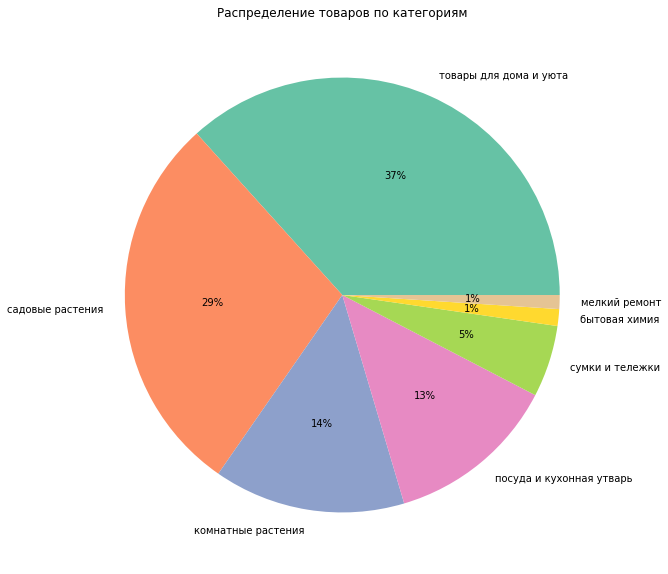

In [53]:
#Show distribution of categories on pie plot
plt.figure(figsize=(10,10))
graf=ecom.groupby('product_category')['product'].nunique().sort_values(ascending=False)
labels=graf.index
colors = sns.color_palette('Set2')
plt.pie(graf, labels=graf.index, colors = colors, autopct='%.0f%%')
plt.title('Распределение товаров по категориям')
plt.show()

Лидеры хит-парада - товары для дома, их доля составляет 37%!

На втором месте - садовые растения, 29%

Бронза достается комнатным растениям - 14%. 

Посуда и товары для кухни - 13%, сумки и тележки - 5%, остальные категории менее 5%

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Анализ категорий: сезонность, продажи по месяцам, дням недели и по часам

Посмотрим на сезонность продаж по категориям в разрезе месяцев, отдельно по количеству и по выручке

In [54]:
#Create list of categories
cat_name = ecom['product_category'].drop_duplicates().to_list()
cat_name

['комнатные растения',
 'товары для дома и уюта',
 'посуда и кухонная утварь',
 'сумки и тележки',
 'садовые растения',
 'бытовая химия',
 'мелкий ремонт']

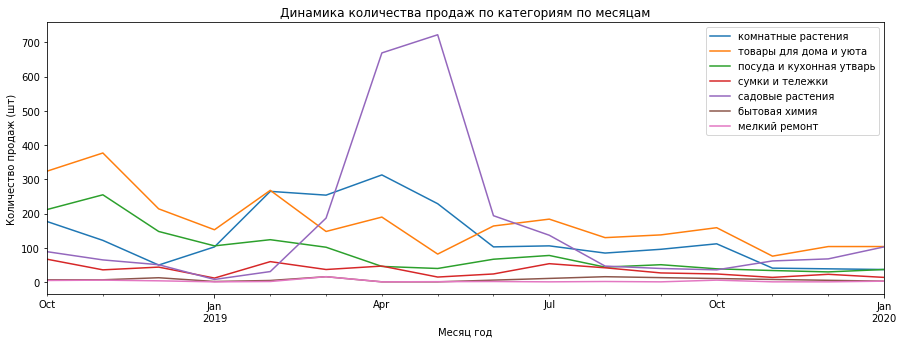

In [55]:
#Group data by month, category and quantity and show plot
for name in cat_name:
    ecom.query('product_category == @name').pivot_table(index = 'month', values = 'quantity', aggfunc = 'sum').\
                        sort_values('month',ascending = False)['quantity'].plot(figsize = (15, 5), label=name)
   
    plt.xlabel('Месяц год')
    plt.title('Динамика количества продаж по категориям по месяцам')
    plt.ylabel('Количество продаж (шт)')
    plt.legend()

По количеству продаж ярко прослеживается сезонность у категории "садовые растения" - в апреле-мае пик продаж. Не удивительно, начинается дачный сезон, все спешат закупиться рассадой и семенами.

Остальные категории выглядят достаточно стабильными, можно отметить небольшой всплеск продаж комнатных растений в феврале-апреле 2019 года, а также грустный равномерный спад кол-ва продаж в категории "посуда и кухонная утварь": в конце 2018 года продавалось более 200 единиц товаров этой категории, а к январю 2020 уровень продаж упал до 50 ед. 

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

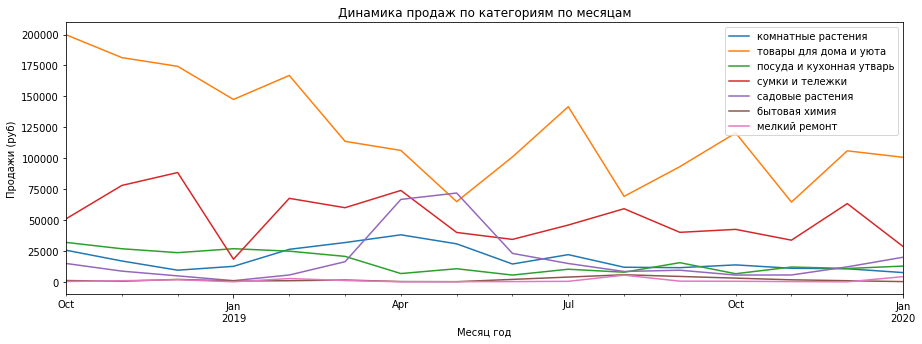

In [56]:
#Group data by month, category and revenue and show plot
for name in cat_name:
    ecom.query('product_category == @name').pivot_table(index = 'month', values = 'revenue', aggfunc = 'sum').\
                        sort_values('month',ascending = False)['revenue'].plot(figsize = (15, 5), label=name)
   
    plt.xlabel('Месяц год')
    plt.title('Динамика продаж по категориям по месяцам')
    plt.ylabel('Продажи (руб)')
    plt.legend()

По выручке очень заметно падения продаж Товаров для дома.

Странно что нет выраженного всплеска выручки по Садовым растениям - по количеству продаж можно было предполагать, что будет и рост выручки, но видимо магазин переборщил со скидками и выручка не так значительно подскочила в апреле-мае 2019, как количество проданных товаров.

Довольно стабильный доход от категории Сумки и тележки, стоит присмотреться к этой категории - от нее идет хороший стабильный доход.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

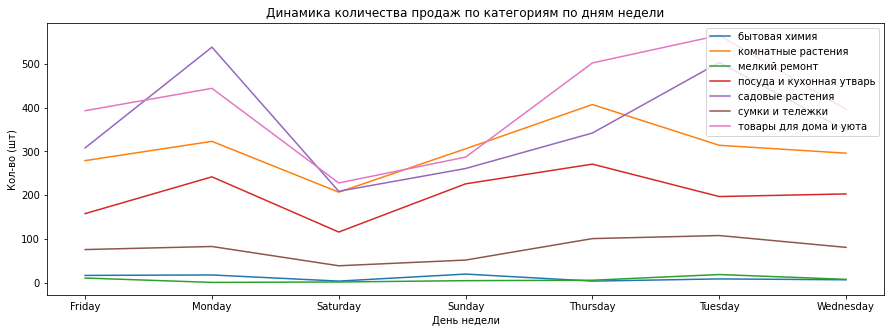

In [57]:
#show line plot with dynamics of categories by week days
ecom.pivot_table(index='weekday', columns='product_category', values='quantity', aggfunc='sum').\
        sort_values(by='weekday').plot(figsize = (15,5))
plt.title('Динамика количества продаж по категориям по дням недели')
plt.xlabel('День недели')
plt.ylabel('Кол-во (шт)')
plt.legend(loc='upper right')
plt.show()

Общая динамика продаж по дням недели похожа для всех категорий: в выходные активность покупателей ниже, в понедельник, вторник и четверг - самая высокая.

В субботу активность самая низкая, все заняты семьей и огородом.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

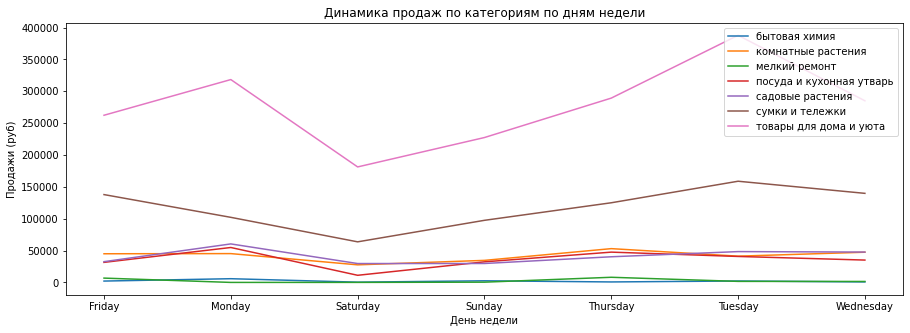

In [58]:
#Group data by weekday, category and revenue and show plot
ecom.pivot_table(index='weekday', columns='product_category', values='revenue', aggfunc='sum').\
        sort_values(by='weekday').plot(figsize = (15,5))
plt.xlabel('День недели')
plt.title('Динамика продаж по категориям по дням недели')
plt.ylabel('Продажи (руб)')
plt.legend(loc='upper right')
plt.show()

В выручке динамика не сильно отличается от предыдущей

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

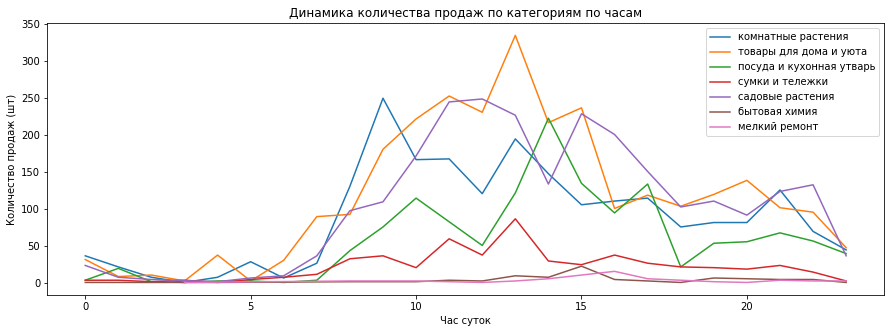

In [59]:
#Group data by hour, category and quantity and show plot
for name in cat_name:
    ecom.query('product_category == @name').pivot_table(index = 'hour', values = 'quantity', aggfunc = 'sum').\
                        sort_values('hour',ascending = False)['quantity'].plot(figsize = (15, 5), label=name)
   
    plt.xlabel('Час суток')
    plt.title('Динамика количества продаж по категориям по часам')
    plt.ylabel('Количество продаж (шт)')
    plt.legend()

Почти все категории продаются днем, начиная примерно с 7 утра и до 21-22 часов вечера.

**Комнатные растения** достигают пика продаж в 9 утра, затем ажиотаж потихоньку спадает. Можно предположить что аудитория, покупающая эту категорию, наиболее активна в первой половине дня и в это время рекламные предложения и адресные акции будут наиболее эффективны.

**Садовые растения** стабильно и много продаются с 10 до 13 часов, в 14 часов снижение - обед, с 15 опять продажи. Это также можно учесть при планировании маркетинговых кампаний.

**Товары для дома** хорошо продаются как в течение дня - пик в 14 часов - так и в 20 часов - имеет смысл запускать больше рекламы по телевизору и радио, т.к. часто в это время семья собирается дома.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

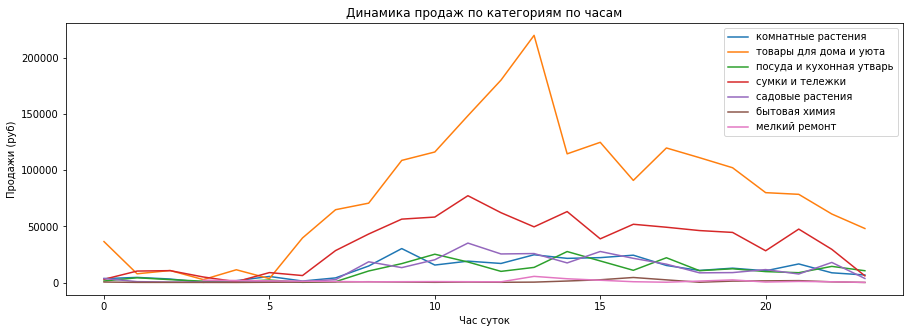

In [60]:
#Group data by hour, category and revenue and show plot
for name in cat_name:
    ecom.query('product_category == @name').pivot_table(index = 'hour', values = 'revenue', aggfunc = 'sum').\
                        sort_values('hour',ascending = False)['revenue'].plot(figsize = (15, 5), label=name)
   
    plt.xlabel('Час суток')
    plt.title('Динамика продаж по категориям по часам')
    plt.ylabel('Продажи (руб)')
    plt.legend()

По выручке лидеры поменялись местами: выручка от продаж у товаров для дома выше, чем у садовых культур.

Можно добавить, что для **Товаров для дома** стоит размещать больше рекламы в соц.сетях и блогах, где часто ее видят домохозяйки и мамы в декрете. И время для этого самое оптимальное - 11-13 часов дня.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Вывод по части 3

Произведено деление всех товаров на 7 категорий (6 отдельных категорий + прочее).
Распределение по количеству:

- товары для дома и уюта - 37%
- садовые растения - 29%
- комнатные растения - 14%
- посуда и кухонная утварь - 13%
- сумки и тележки - 5%
- бытовая химия - 1%
- мелкий ремонт - 1%
- прочее - менее 1%

*Анализ динамики по месяцам:*

**Количество**: ярко прослеживается сезонность у категории "садовые растения" - в апреле-мае пик продаж. Также можно отметить небольшой всплеск продаж комнатных растений в феврале-апреле 2019 года и грустный равномерный спад кол-ва продаж посуды.

**Выручка**: стало теперь очевидно что в основном падение (которое ранее наблюдали в разделе 2 Исследовательский анализ данных) произошло из-за категории Товары для дома: в конце 2018 - начале 2019 года эта категория была лидером продаж, но с апреля 2019 снижается. Две категории - "товары для дома и уюта" и "садовые растения" - приносят больше всего доходов магазину, вместе с еще одной категорией - "сумки и тележки". По остальным категориям также падение, но не такое заметное для магазина.

*Анализ динамики по дням недели:*

**Количество**: общая динамика продаж по дням недели похожа для всех категорий: в выходные активность покупателей ниже, в понедельник, вторник и четверг - самая высокая.

**Выручка**: динамика аналогичная с кол-вом.

*Анализ динамики по часам:*

**Количество**: в основном все категории продаются днем, начиная примерно с 7 утра и до 21-22 часов вечера. Комнатные растения достигают пика продаж в 9 утра, садовые растения стабильно и много продаются с 10 до 15 часов. Товары для дома хорошо продаются как в течение дня, так и в 20 часов. Это можно учесть при планировании акций, рассылок и рекламных кампаний. 

**Выручка**: Пики продаж приходятся на 11-14 часов, но лидеры поменялись местами: выручка от продаж у товаров для дома выше, чем у садовых культур. Для Товаров для дома стоит размещать больше рекламы в соц.сетях и блогах, где часто ее видят домохозяйки и мамы в декрете. И время для этого самое оптимальное - 11-12 часов дня. Садовые растения на пике в 14 часов, примерно также как и с количеством; это время отлично подойдет для рассылки спец. предложений постоянным клиентам.

<div class="alert alert-success">
<b>👍 Успех:</b> Отличный анализ продаж по категориям, молодец!
</div>

## Деление ассортимента на сегменты

Для разделения ассортимента на сегменты, воспользуемся ABCXYZ анализом, затем проанализируем полученные сегменты в динамике для более подробной картины поведения ассортимента.

### ABCXYZ анализ для деления всех товаров 
(ABC - по доле продаж, XYZ - по количеству продаж)

Для проведения анализа, создадим два новых датасета и подготовим необходимые колонки

In [61]:
#group data by product and create new table
abc_analysis = ecom.groupby('product').agg({'revenue':'sum'}).reset_index()
#add new columns
abc_analysis=abc_analysis.sort_values(by='revenue',ascending=False)
abc_analysis['rev_share'] = abc_analysis['revenue']/(abc_analysis['revenue'].sum())*100
abc_analysis['acc_rev_share'] = abc_analysis['rev_share'].cumsum()
abc_analysis.head(5)

,product,revenue,rev_share,acc_rev_share
1177,простынь вафельная 200х180 см wellness rw180-0...,53232.0,1.460026,1.460026
1598,сумка-тележка 2-х колесная gimi argo синяя,48231.0,1.322861,2.782887
1624,сумка-тележка хозяйственная andersen scala sho...,28045.0,0.769207,3.552094
1681,сушилка meliconi stendy junior,27970.0,0.767150,4.319244
828,мусорный контейнер hailo bigbin swing 45 0845-...,27560.0,0.755905,5.075148


Судя по столбцу с кумулятивной выручкой, ассортимент довольно сильно размыт и 80% выручки приносит не 20% товаров а гораздо больше. Применим деление 50 / 40 / 10 для сегментирования по принципу доходности

In [62]:
#write function for abc dictribution
def abc(acc_rev_share):
    if acc_rev_share <= 50:
        return 'a'
    if (acc_rev_share > 50) & (acc_rev_share <=90):
        return 'b'
    if acc_rev_share > 90:
        return 'c'

In [63]:
# apply function to new column
abc_analysis['abc'] = abc_analysis['acc_rev_share'].apply(abc)
abc_analysis.head(5)

,product,revenue,rev_share,acc_rev_share,abc
1177,простынь вафельная 200х180 см wellness rw180-0...,53232.0,1.460026,1.460026,a
1598,сумка-тележка 2-х колесная gimi argo синяя,48231.0,1.322861,2.782887,a
1624,сумка-тележка хозяйственная andersen scala sho...,28045.0,0.769207,3.552094,a
1681,сушилка meliconi stendy junior,27970.0,0.767150,4.319244,a
828,мусорный контейнер hailo bigbin swing 45 0845-...,27560.0,0.755905,5.075148,a


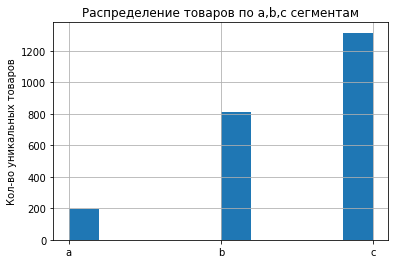

In [64]:
#show histogram of abc distribution
abc_analysis['abc'].hist()
plt.title('Распределение товаров по a,b,c сегментам')
plt.ylabel('Кол-во уникальных товаров')
plt.show()

На графике хорошо видно, что в группу a попали 200 товаров - это и есть самые доходные товары, приносящие 50% выручки.

Продолжим анализ: посмотрим какие товары чаще всего заказывали повторно, то есть разделим сегменты по популярности.

In [65]:
#group data by product and create new table
xyz_analysis = ecom.groupby('product').agg({'order_id':'nunique'}).reset_index()
#add new columns
xyz_analysis=xyz_analysis.sort_values(by='order_id',ascending=False)
xyz_analysis['popularity'] = xyz_analysis['order_id']/(xyz_analysis['order_id'].sum())*100
xyz_analysis['acc_pop'] = xyz_analysis['popularity'].cumsum()
xyz_analysis.head(5)

,product,order_id,popularity,acc_pop
1025,пеларгония розебудная red pandora укорененный ...,66,1.203721,1.203721
1023,пеларгония розебудная prins nikolai укорененны...,56,1.021339,2.225059
997,пеларгония зональная диам. 12 см сиреневый пол...,53,0.966624,3.191683
1598,сумка-тележка 2-х колесная gimi argo синяя,45,0.820719,4.012402
1022,пеларгония розебудная mary укорененный черенок,40,0.729528,4.741930


Применим пропорцию 40 / 40 / 20 для сегментации по принципу популярности

In [66]:
#write function for xyz dictribution
def xyz(acc_share):
    if acc_share <= 40:
        return 'x'
    if (acc_share > 40) & (acc_share <=80):
        return 'y'
    if acc_share > 80:
        return 'z'

In [67]:
# apply function to new column
xyz_analysis['xyz'] = xyz_analysis['acc_pop'].apply(xyz)
xyz_analysis.head(5)

,product,order_id,popularity,acc_pop,xyz
1025,пеларгония розебудная red pandora укорененный ...,66,1.203721,1.203721,x
1023,пеларгония розебудная prins nikolai укорененны...,56,1.021339,2.225059,x
997,пеларгония зональная диам. 12 см сиреневый пол...,53,0.966624,3.191683,x
1598,сумка-тележка 2-х колесная gimi argo синяя,45,0.820719,4.012402,x
1022,пеларгония розебудная mary укорененный черенок,40,0.729528,4.741930,x


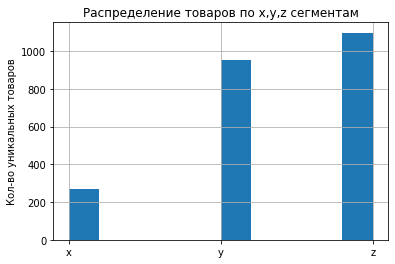

In [68]:
#show histogram of xyz distribution
xyz_analysis['xyz'].hist()
plt.title('Распределение товаров по x,y,z сегментам')
plt.ylabel('Кол-во уникальных товаров')
plt.show()

По популярности лидеров чуть более 200.

Теперь добавим столбцы с распределением в основной датасет и "склеим" их в новом столбце

In [69]:
#add new column with abc distribution to main dataframe
ecom = ecom.merge(abc_analysis[['product','abc']])
ecom.head(5)

,date,customer_id,order_id,product,quantity,price,revenue,month,year_month,weekday,hour,two_words,product_category,abc
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,2018-10-01,2018/10,Monday,0,комнатное растение,комнатные растения,c
1,2018-10-11 13:00:00,4d59d9e7-55be-43a0-88c4-8e7261c5c6d5,68610,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,2018-10-01,2018/10,Thursday,13,комнатное растение,комнатные растения,c
2,2018-10-18 14:00:00,b371ce80-259a-4bb8-a550-0ebff690e3e1,68682,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,2018-10-01,2018/10,Thursday,14,комнатное растение,комнатные растения,c
3,2019-02-10 10:00:00,0a4e4711-5cb7-4bae-93cf-6731902708de,70186,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,2019-02-01,2019/02,Sunday,10,комнатное растение,комнатные растения,c
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,2018-10-01,2018/10,Monday,0,комнатное растение,комнатные растения,c


In [70]:
#add new column with xyz distribution to main dataframe
ecom = ecom.merge(xyz_analysis[['product','xyz']])
ecom.head(5)

,date,customer_id,order_id,product,quantity,price,revenue,month,year_month,weekday,hour,two_words,product_category,abc,xyz
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,2018-10-01,2018/10,Monday,0,комнатное растение,комнатные растения,c,x
1,2018-10-11 13:00:00,4d59d9e7-55be-43a0-88c4-8e7261c5c6d5,68610,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,2018-10-01,2018/10,Thursday,13,комнатное растение,комнатные растения,c,x
2,2018-10-18 14:00:00,b371ce80-259a-4bb8-a550-0ebff690e3e1,68682,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,2018-10-01,2018/10,Thursday,14,комнатное растение,комнатные растения,c,x
3,2019-02-10 10:00:00,0a4e4711-5cb7-4bae-93cf-6731902708de,70186,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,2019-02-01,2019/02,Sunday,10,комнатное растение,комнатные растения,c,x
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,2018-10-01,2018/10,Monday,0,комнатное растение,комнатные растения,c,y


In [71]:
#add new column for segment 
ecom['segment'] = ecom['abc'] + ecom['xyz']

Посмотрим на распределение сегментов

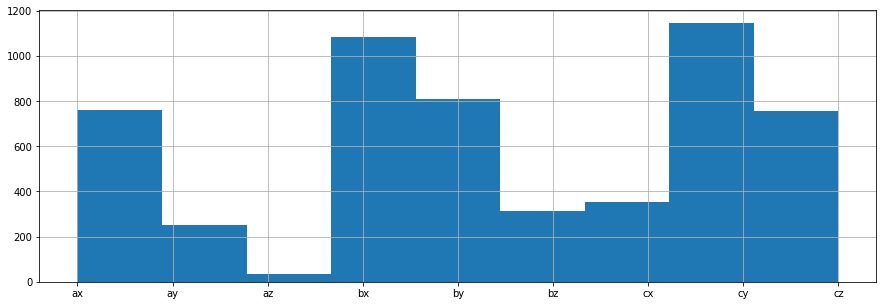

In [72]:
#show segment distribution
ecom['segment'].sort_values().hist(bins=9,figsize = (15,5))
plt.show()

По преобладанию сегментов в датафрейме, можно сделать такой вывод:

- ax) флагманских товаров довольно много, с учетом того что они повторяются в основном датасете доля их в общем количестве около 15%
- ay) самые доходные и средне популярные товары встречаются реже, примерно 250 раз
- az) очень доходные, но не сильно популярные (возможно, разовые или сезонные) - в меньшинстве, всего около 40 продаж
- bx) средне доходная но очень популярная категория, на втором месте по объему, крайне важно уделить внимание товарам этой категории т.к. их реально перевести в категорию ax и при этом их много - 20% всех продаж
- by) тоже важный и при этом объемный сегмент - товары этого сегмента приносят средний доход и чуть менее популярны. 
В идеале, эти товары нужно переводить в категории bx,ay. Сделать это можно при помощи программ лояльности (повысит популярность) и политики up-sales (когда товары предлагаются в дополнение к другому товару). Также имеет смысл подумать над ценовой политикой - применить скидки, чтобы покупатели "попробовали" товар, а далее продавать по полной стоимости
- bz) средне-доходная и не попуярная категория, к ней также применимы методы выше
- cx) низко-доходная но популярная категория. Если логистика позволяет, лучше всегда иметь эти товары в наличии, но они не в приоритете
- cy) самая объемная категория, при этом низко-доходная и средне-популярная. Возможно, магазин зря тратит силы и ресурсы на товары, которые приносят мало дохода. Ведь все эти товары (а их очень много!) требуют обработки в системе, занимают место на складе,  и если они еще и низкомаржинальные - заниматься ими вообще нет смысла. Либо стоит вложиться в перевод этой категории в более доходную или более популярную, т.к. объем ее все-таки впечатляет и не хочется терять столько товаров
- cz) внимательно изучить данный ассортимент и возможно избавиться от него, т.к. он самый низкодоходный и непопулярный.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

Посмотрим сколько уникальных товаров получилось в каждом сегменте

In [73]:
#show number of unique goods in each segment
ecom.groupby('segment').agg({'product':'nunique'}).reset_index()

,segment,product
0,ax,60
1,ay,103
2,az,35
3,bx,143
4,by,356
5,bz,311
6,cx,68
7,cy,496
8,cz,751


Товары категорий **ax** и **ay** - наиболее приоритетные и должны быть всегда в наличии, они приносят макимальный доход магазину и имеют постоянных клиентов, которые заказывают товары у нас снова и снова. Акций и скидок по ним предоставлять нет смысла, они итак хорошо продаются. ***Главное - следить за наличием и бесперебойностью поставок***.

**az** самая малочисленная группа, видимо это товары которые продавались однократно но по высокой цене, возможно новинки или акционные предложения. Рекомендаций по этой группе пока нет.

**bx** товары высокой популярности, имеют своих лояльных покупателей, поэтому также ***всегда должны быть в наличии***. 

**by**,**bz** такие товары надо продвигать, работать над тем чтобы ***переводить их в более популярные/доходные группы***.

**cx** группа небольшая, но товары высокой популярности, по возможности должны быть в наличии.

**cy** стоит проанализировать товары этой категории, но не тратить на них слишком много времени. 

**cz** уникальных товаров в этом сегменте больше всех, при этом данная группа самая неперспективная. Не стоит держать такой балласт, чать товаров точно ***имеет смысл удалить из ассортимента***.

Посмотрим, какие категории товаров преобладают в каждом сегменте. 

Для удобства, посмотрим отдельно товары а-сегмента, b- и c-сегментов.

In [74]:
#create new table for a-segment analysis
a_segment = ecom.loc[((ecom['segment'] == "ax")|(ecom['segment'] == "ay")|(ecom['segment'] == "az"))].sort_values(by='segment')

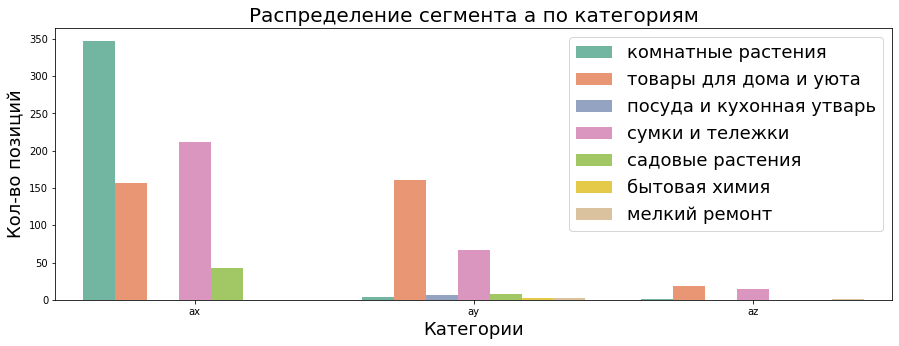

In [75]:
#build plot for distribution of categories in a-segments
plt.figure(figsize=(15,5))
sns.countplot(x=a_segment['segment'], hue=ecom['product_category'],palette = 'Set2')
plt.title('Распределение сегмента a по категориям',fontsize=20)
plt.xlabel('Категории', fontsize=18)
plt.ylabel('Кол-во позиций',fontsize=18)
plt.legend(loc='upper right', fontsize=18)
plt.show()

В самую перспективную группу **ax** попали в основном Комнатные растения, но довольно много также и Сумок-тележек и Садовых растений;

В группе **ay** преобладают Товары для дома

Группа **az** малочисленна

Посмотрим какие товары вошли в самую масштабную категорию самого перспективного сегмента

In [76]:
#show home flowers in ax category
ecom.loc[((ecom['segment'] == "ax")&(ecom['product_category'] == "комнатные растения"))].\
            sort_values(by='revenue',ascending=False)

,date,customer_id,order_id,product,quantity,price,revenue,month,year_month,weekday,hour,two_words,product_category,abc,xyz,segment
587,2019-04-21 13:00:00,d2312fff-3f16-482f-8303-7f54680807f8,14666,пеларгония зональная диам. 12 см красная махровая,18,150.0,2700.0,2019-04-01,2019/04,Sunday,13,пеларгония зональная,комнатные растения,a,x,ax
590,2019-05-09 21:00:00,f479df63-c15c-4d4e-9866-cd91b3e8bcfc,14745,пеларгония зональная диам. 12 см красная махровая,11,188.0,2068.0,2019-05-01,2019/05,Thursday,21,пеларгония зональная,комнатные растения,a,x,ax
2729,2019-03-30 08:00:00,4f75ae10-0ffb-4728-8885-3dadfa7204f7,14601,пеларгония розебудная margaretha укорененный ч...,10,135.0,1350.0,2019-03-01,2019/03,Saturday,8,пеларгония розебудная,комнатные растения,a,x,ax
2602,2019-04-01 20:00:00,42f16745-609a-44f9-9aec-aeedecd22d15,14606,пеларгония розебудная red pandora укорененный ...,9,135.0,1215.0,2019-04-01,2019/04,Monday,20,пеларгония розебудная,комнатные растения,a,x,ax
691,2019-05-14 19:00:00,bea7a833-2074-42db-bc49-4457abd3c930,14776,пеларгония зональная махровая лососевая,7,161.0,1127.0,2019-05-01,2019/05,Tuesday,19,пеларгония зональная,комнатные растения,a,x,ax
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2606,2019-04-08 13:00:00,1e5e5080-e5de-41da-b930-4d627510f02e,71063,пеларгония розебудная red pandora укорененный ...,1,134.0,134.0,2019-04-01,2019/04,Monday,13,пеларгония розебудная,комнатные растения,a,x,ax
2605,2019-04-05 04:00:00,8468a213-51b5-4432-9f4f-d82c8699120d,71018,пеларгония розебудная red pandora укорененный ...,1,134.0,134.0,2019-04-01,2019/04,Friday,4,пеларгония розебудная,комнатные растения,a,x,ax
2499,2019-08-05 13:00:00,24f2c305-bb75-4169-abbf-c874bfbe0e90,72212,пеларгония розебудная prins nikolai укорененны...,1,134.0,134.0,2019-08-01,2019/08,Monday,13,пеларгония розебудная,комнатные растения,a,x,ax
2443,2019-07-16 11:00:00,ede09e7d-b084-49ee-809d-873bfabe1fab,71996,пеларгония розебудная mary укорененный черенок,1,134.0,134.0,2019-07-01,2019/07,Tuesday,11,пеларгония розебудная,комнатные растения,a,x,ax


Не зря нам казалось, что продается много пеларгоний - это просто королева продаж нашего магазина!

Повторим трюк с товарами сегмента b

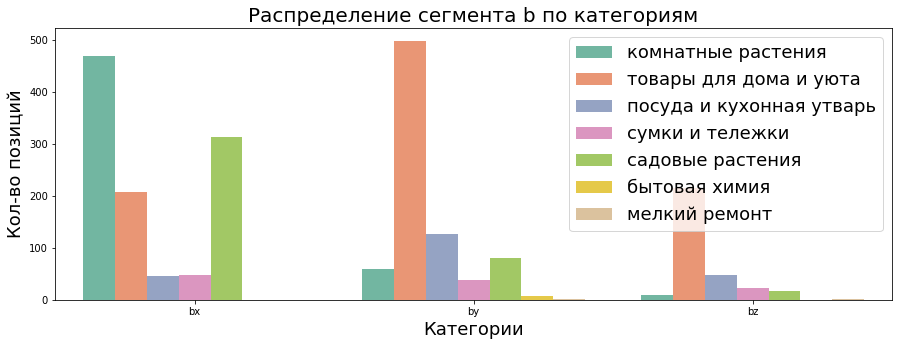

In [77]:
#create table for average segment - b-segment
b_segment = ecom.loc[((ecom['segment'] == "bx")|(ecom['segment'] == "by")|(ecom['segment'] == "bz"))].sort_values(by='segment')
#build plot for distribution of categories in b-segments
plt.figure(figsize=(15,5))
sns.countplot(x=b_segment['segment'], hue=ecom['product_category'],palette = 'Set2')
plt.title('Распределение сегмента b по категориям',fontsize=20)
plt.xlabel('Категории', fontsize=18)
plt.ylabel('Кол-во позиций',fontsize=18)
plt.legend(loc='upper right', fontsize=18)
plt.show()

По сегменту b картина следующая:

**bx** - тут опять лидируют комнатные растения, но также много садовых. Видимо, это цветы с более низкой ценой и поэтому не дают таких масштабных продаж. 

Но при этом данный ассортимент очень важен для магазина - несмотря на не самую высокую цену, у этих товаров много заказов, то есть у них есть лояльные и преданные магазину покупатели.

**by** представлен больше товарами для дома. Ниже посмотрим прицельно на эту категорию в данном сегменрте - скорее всего в ней есть как типичные для магазина товары, так и аутсайдеры.


В категориях **bx** и **by** можно порекомендовать поддерживать разумное количество товаров на складе, а также "подогревать" интерес постоянных покупателей, предлагая вместе с обычно покупаемыми товарами новинки и напоминая про акции.

Категория **bz** малочисленна, в нее входят товары которые покупают редко но они приносят среднюю доходность. Представлена в основном товарами для дома.

In [78]:
#show home goods in by category
ecom.loc[((ecom['segment'] == "by")&(ecom['product_category'] == "товары для дома и уюта"))].\
            sort_values(by='revenue',ascending=False)

,date,customer_id,order_id,product,quantity,price,revenue,month,year_month,weekday,hour,two_words,product_category,abc,xyz,segment
5105,2019-07-08 08:00:00,22160585-7ab8-45bf-82d4-95752ea1f74c,71903,гладильная доска zalger amelia 400-401 дсп 115...,6,749.0,4494.0,2019-07-01,2019/07,Monday,8,гладильная доска,товары для дома и уюта,b,y,by
2036,2018-12-17 17:00:00,86c97bf1-c834-423e-9e38-8acda68f97e8,69418,сушилка для белья на ванну leifheit adria 72708,1,4124.0,4124.0,2018-12-01,2018/12,Monday,17,сушилка для,товары для дома и уюта,b,y,by
1321,2019-06-06 07:00:00,6cc2b353-7824-4f48-b0a5-c44f6e2a4fb7,71623,коврик противоскользящий пузырьки 70х38 см про...,20,202.0,4040.0,2019-06-01,2019/06,Thursday,7,коврик противоскользящий,товары для дома и уюта,b,y,by
3840,2019-04-07 20:00:00,2efd4944-edbd-4e6e-bf52-205e39dcda5e,71055,ткань универсальная из микрофибры micro magic ...,13,285.0,3705.0,2019-04-01,2019/04,Sunday,20,ткань универсальная,товары для дома и уюта,b,y,by
4533,2019-05-04 12:00:00,5a5a3e12-dd24-4580-9671-3ba5472817f1,71349,сушилка для белья на стену leifheit telegant 1...,1,3674.0,3674.0,2019-05-01,2019/05,Saturday,12,сушилка для,товары для дома и уюта,b,y,by
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,"таз пластмассовый 6,0 л пищевой квадратный ""тю...",1,97.0,97.0,2018-10-01,2018/10,Friday,13,таз пластмассовый,товары для дома и уюта,b,y,by
305,2019-11-13 15:00:00,1ccce13d-1ee3-4a7b-aecf-6118525a3ffc,111166,набор прищепок большие пластиковые rozenbal пи...,1,86.0,86.0,2019-11-01,2019/11,Wednesday,15,набор прищепок,товары для дома и уюта,b,y,by
1740,2018-11-23 20:00:00,278cffb9-4414-449a-8cb8-ffdbef1bf1d8,69100,"таз пластмассовый 4,5 л пищевой ""космея"" (анго...",1,67.0,67.0,2018-11-01,2018/11,Friday,20,таз пластмассовый,товары для дома и уюта,b,y,by
1816,2019-11-28 12:00:00,9848d80a-6e76-4eb0-b382-1449cd67c385,104355,"таз пластмассовый 6,0 л пищевой м2511, 1404015",1,63.0,63.0,2019-11-01,2019/11,Thursday,12,таз пластмассовый,товары для дома и уюта,b,y,by


В лидеров списка имеет смысл вложиться - это гладильные доски, коврики и тряпочки для уборки.

А вот от тазиков и прищепок возможно имеет смысл отказаться - они продаются штучно, приносят мало дохода.

Посмотрим теперь на сегмент-аутсайдер "с"

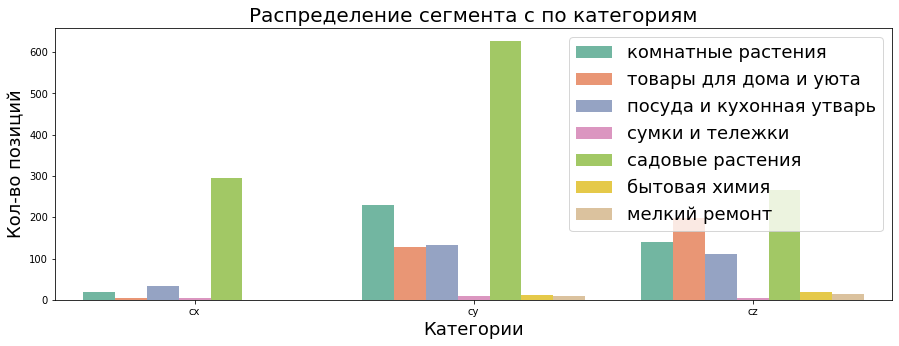

In [79]:
#create table for worst segment - c-segment
b_segment = ecom.loc[((ecom['segment'] == "cx")|(ecom['segment'] == "cy")|(ecom['segment'] == "cz"))].sort_values(by='segment')
#build plot for distribution of categories in c-segments
plt.figure(figsize=(15,5))
sns.countplot(x=b_segment['segment'], hue=ecom['product_category'],palette = 'Set2')
plt.title('Распределение сегмента c по категориям',fontsize=20)
plt.xlabel('Категории', fontsize=18)
plt.ylabel('Кол-во позиций',fontsize=18)
plt.legend(loc='upper right', fontsize=18)
plt.show()

В сегменте **cx** - садовые растения, много садовых растений!

Эти товары покупаются регулярно, но приносят мало дохода. Сильно следить за их наличием на складе нет смысла, т.к. если их не окажется - магазин не обеднеет. Но возмолжно при большом обороте данные товары только отнимают ресурсы магазина, имеет смысл посмотреть на них детально и при необходимости пересмотреть ценовую политику (поднять цену).

Очень масштабный сегмент **cy** точно требует внимания. Тут также в лидерах садовые растения, которые почему-то приносят малый доход и не очень стабильно продаются, посмотрим на них дополнительно ниже. 

Однозначно стоит присмотреться к этим товарам и постараться перевести их или в группу **by** (ценовая политика) или в группу **cx** (спец предложения при последующих заказах, скидки и программы лояльности), либо отказаться от их наличия в ассортименте.

В сегмент **cz** попало мало товаров, что радует, среди них опять много садовых культур. Данную категорию имеет смысл изучить для целей удаления из ассортимента.

In [80]:
#show garden plants in cz category
ecom.loc[((ecom['segment'] == "cy")&(ecom['product_category'] == "садовые растения"))].\
            sort_values(by='revenue',ascending=False)

,date,customer_id,order_id,product,quantity,price,revenue,month,year_month,weekday,hour,two_words,product_category,abc,xyz,segment
4539,2019-07-12 19:00:00,931ac8c8-ff37-4764-bb17-306c219a7a6d,14900,аргирантерум рассада однолетних цветов в горшк...,4,142.0,568.0,2019-07-01,2019/07,Friday,19,аргирантерум рассада,садовые растения,c,y,cy
3237,2019-03-05 11:00:00,051edfd2-b09e-4e48-b12d-cf6ab2fdcc5f,70599,тюльпан louvre (лувр) бахромчатый 25 шт,15,37.0,555.0,2019-03-01,2019/03,Tuesday,11,тюльпан louvre,садовые растения,c,y,cy
4464,2019-05-28 18:00:00,63d48b37-11ca-46ec-b858-26cc165f7629,14825,"однолетнее растение циния в кассете 4 шт, россия",6,82.0,492.0,2019-05-01,2019/05,Tuesday,18,однолетнее растение,садовые растения,c,y,cy
4174,2019-04-22 09:00:00,bfa5c5ea-61c5-4cd8-b257-329981a70ea0,14668,бегония клубневая рассада однолетних цветов в ...,3,142.0,426.0,2019-04-01,2019/04,Monday,9,бегония клубневая,садовые растения,c,y,cy
4444,2019-04-28 17:00:00,cce13789-408b-44e1-8147-3c74dc393bf1,14701,цинерания рассада однолетних цветов в кассете ...,2,210.0,420.0,2019-04-01,2019/04,Sunday,17,цинерания рассада,садовые растения,c,y,cy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3212,2019-09-21 21:00:00,6718a7fc-75c2-4b8a-820d-b2960be23ca7,14932,"укроп обильнолистный 3,0 г 4660010772562",1,10.0,10.0,2019-09-01,2019/09,Saturday,21,укроп обильнолистный,садовые растения,c,y,cy
3213,2020-01-08 16:00:00,aa7151ae-8da0-41ca-85b6-5c1b331d5bdc,107324,"укроп обильнолистный 3,0 г 4660010772562",1,10.0,10.0,2020-01-01,2020/01,Wednesday,16,укроп обильнолистный,садовые растения,c,y,cy
1868,2019-07-03 22:00:00,1ec1ad59-a29b-4949-929d-f4fc4fe14758,14887,"алиссум (лобулярия) снежные одежды 0,2 г 46500...",1,9.0,9.0,2019-07-01,2019/07,Wednesday,22,алиссум (лобулярия),садовые растения,c,y,cy
1878,2018-12-03 11:00:00,2c8b9386-2e8c-4ee9-8aa4-2b4875b68578,14514,"львиный зев волшебный ковер 0,05 г 4660010779639",1,9.0,9.0,2018-12-01,2018/12,Monday,11,львиный зев,садовые растения,c,y,cy


Вполне адекватный список, комментариев к нему пока нет

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Анализ динамики продаж всех сегментов

Посмотрим на сегменты поближе - оценим как они вели себя в течение исследуемого периода.

Для удобства будем смотреть не все сегменты вместе, а разделим теперь по принципу xyz: сперва посмотрим наиболее популярные, много раз купленные товары; затем средние по популярности и потом самые непопулярные.

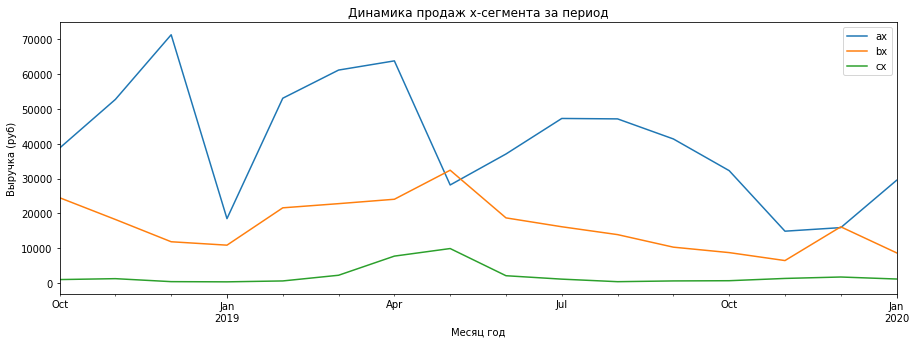

In [81]:
#create table for most popular segment - x-segment
x_segment = ecom.loc[((ecom['segment'] == "ax")|(ecom['segment'] == "bx")|(ecom['segment'] == "cx"))].sort_values(by='segment')
#show line plot with dynamics of x-segment
x_segment.pivot_table(index='month', columns='segment', values='revenue', aggfunc='sum').plot(figsize = (15,5))
plt.title('Динамика продаж x-сегмента за период')
plt.xlabel('Месяц год')
plt.ylabel('Выручка (руб)')
plt.legend(loc='upper right')
plt.show()

Динамика **ax** сегмента расстраивает - в конце исследуемого периода идет сильный спад. Причиной может быть как недостаточное количество товара на складе, так и спад интереса к основным категориям сегмента - Комнатным растениям.

По остальным сегментам тоже динамика не очень, в мае 2019 года был небольшой подъем, но потом идет спад.

В целом можно заключить, что по принципу популярности идет падение продаж, наиболее лояльные клиенты нас покидают.

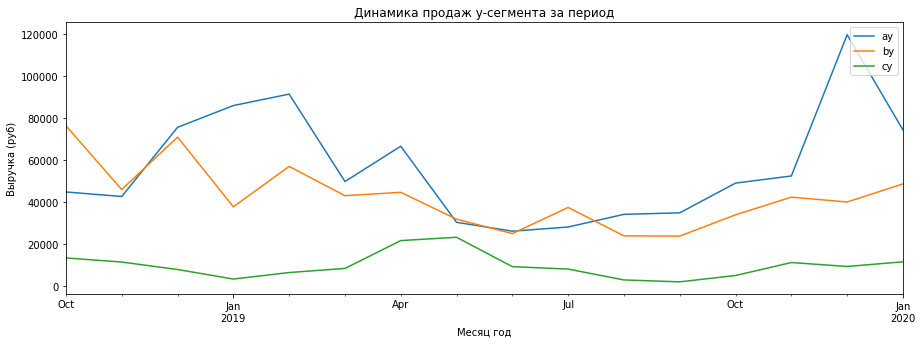

In [82]:
#create table for average popular segment - y-segment
y_segment = ecom.loc[((ecom['segment'] == "ay")|(ecom['segment'] == "by")|(ecom['segment'] == "cy"))].sort_values(by='segment')
#show line plot with dynamics of y-segment
y_segment.pivot_table(index='month', columns='segment', values='revenue', aggfunc='sum').plot(figsize = (15,5))
plt.title('Динамика продаж y-сегмента за период')
plt.xlabel('Месяц год')
plt.ylabel('Выручка (руб)')
plt.legend(loc='upper right')
plt.show()

В сегменте средне популярных товаров (у) ситуация получше: небольшой провал в середине 2019 года, затем подъем, причем самый большой у высокодоходных товаров. Надо сделать ставку на товары категорий **ay**, **by** - посмотреть детально ассортимент и попытаться перевести эти товары в **ax**, **bx**.

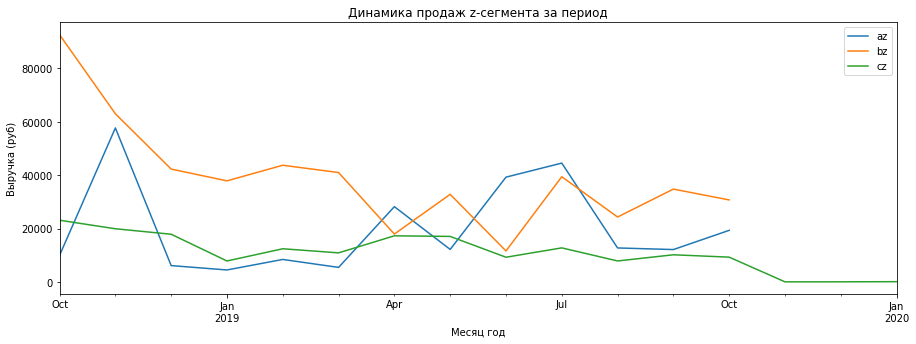

In [83]:
#create table for least popular segment - z-segment
z_segment = ecom.loc[((ecom['segment'] == "az")|(ecom['segment'] == "bz")|(ecom['segment'] == "cz"))].sort_values(by='segment')
#show line plot with dynamics of z-segment
z_segment.pivot_table(index='month', columns='segment', values='revenue', aggfunc='sum').plot(figsize = (15,5))
plt.title('Динамика продаж z-сегмента за период')
plt.xlabel('Месяц год')
plt.ylabel('Выручка (руб)')
plt.legend(loc='upper right')
plt.show()

В конце периода товары сегменотов **az**, **bz** пропадают, видимо их распродали. Возможно, если бы они были в наличии продажи не падали бы так драматично.

А вот **cz** в наличии были весь период, но дохода от них мало

### Вывод по части 4

На основании доходности и популярности товаров, выделены 9 сегментов:
- **ax** - самые доходные и популярные товары. Уникальных товаров 60, в основном представлены Комнатными растениями, но также среди них много Сумок-тележек. На эти две категории стоит сделать особенный упор, т.к. они приносят основной доход магазину. Наименования из списка всегда должны быть в наличии.
Динамика **ax** сегмента расстраивает - в конце исследуемого периода идет сильный спад. Причиной может быть как недостаточное количество товара на складе, так и спад интереса к основным категориям сегмента - Комнатным растениям.
- **ay** - самые доходные но средне популярные товары. 103 уникальных наименований, в основном Товары для дома и Сумки-тележки. Динамика сегмента также неутешительна - почти весь период идет спад продаж, небольшие подьемы в мае и декабре 2019 г
Эти товары также всегда должны быть на складе, каких-то дорогостоящих акций по ним нет смысла устраивать, но можно предложить клиентам программы чтобы сделать их более лояльными.
- **az** - самые доходные но не популярные товары. Всего 35 товаров, в основном сумки-тележки. Динамика за период ровная.
- **bx** - средне доходные но очень популярные товары, 143 шт. Здесь комнатные и садовые растения, динамика ровная с пиками в мае и декабре 2019. 
- **by** - средне доходные и средне популярные товары, 356 шт. Товары для дома и садовые растения, в течение периода в целом спад но в конце 2019 / начале 2020 года идет подъем продаж. В лидеров списка имеет смысл вложиться - это гладильные доски, коврики и тряпочки для уборки. А вот от тазиков и прищепок возможно имеет смысл отказаться - они продаются штучно, приносят мало дохода.
- **bz** - средне доходные и не популярные товары, 311 шт, в основном товары для дома. Динамика ниспадающая, в октябре 2019 года сегмент пропадает, видимо товары в нем закончились. Возможно, если бы они были в наличии продажи не падали бы так драматично.
- **cx** - не приносящие большого дохода, но популярные товары, 68 шт, в основном садовые растения, динамика ровная
- **cy** - не доходные и средне популярные товары, 496 шт, в основном садовые растения, динамика ровная
- **cz** - не доходные и не популярные товары, *аутсайдеры*, 751 шт, в основном садовые растения, динамика ровная, ниспадающая

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

## Проверка гипотез

Перейдем к проверке гипотез для подтверждения своих идей относительно ассортимента магазина

### Среднее количество продаж в основном и дополнительном ассортименте не меняется за год

Ранее мы определили категории товаров и выделили наиболее популярные, составляющие основной ассортимент:

- товары для дома и уюта - 37%
- садовые растения - 29%
- комнатные растения - 14%
- посуда и кухонная утварь - 13%

А также менее популярные, составляющие дополнительный ассортимент:
- сумки и тележки - 5%
- бытовая химия - 1%
- мелкий ремонт - 1%
- прочее - менее 1%

Проверку сделаем на двух месяцах в начале и конце года: данные у нас с 1 октября 2018 года по 31 января 2020 года, но декабрь и январь обычно очень непоказательные месяцы - в декабре много нетипичных покупок из-за предстоящих праздников, в январе наоборот люди отдыхают и почти ничего не покупают. Возьмем для сравнения ноябрь 2018 и 2019 гг.

Сформулируем гипотезы:

**H0**: среднее кол-во продаж в основном и дополнительном ассортименте одинаковое в ноябре 2018 и 2019 гг

**Н1**: среднее кол-во продаж в основном и дополнительном ассортименте отличается в ноябре 2018 и 2019 гг

Подготовим выборки для сравнения и произведем проверку гипотез.

In [84]:
#prepare samples for comparison of quantity om main assortment
sample_a = ecom.query('month == "2018-10-01"')
sample_a = sample_a[(sample_a['product_category'] =='садовые растения')|\
                    (sample_a['product_category'] =='товары для дома и уюта')|\
                    (sample_a['product_category'] =='комнатные растения')|\
                    (sample_a['product_category'] =='посуда и кухонная утварь')]['quantity']
sample_b = ecom.query('month == "2019-11-01"')
sample_b = sample_b[(sample_b['product_category'] =='садовые растения')|\
                    (sample_b['product_category'] =='товары для дома и уюта')|\
                    (sample_b['product_category'] =='комнатные растения')|\
                    (sample_b['product_category'] =='посуда и кухонная утварь')]['quantity']

In [85]:
#new variable results for method of hypotesis check
results = st.ttest_ind(
    sample_a, sample_b,
    equal_var = False
)    

alpha = 0.05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 9.727704614634714e-09
Отвергаем нулевую гипотезу


In [86]:
#show average quantities
print('Среднее кол-во продаж в основном ассортименте в ноябре 2018 г:',sample_a.mean())
print('Среднее кол-во продаж в основном ассортименте в ноябре 2019 г:',sample_b.mean())

Среднее кол-во продаж в основном ассортименте в ноябре 2018 г: 1.8694638694638694
Среднее кол-во продаж в основном ассортименте в ноябре 2019 г: 1.0757575757575757


По основному ассортименту отвергаем нулевую гипотезу - существует статистически значимая разница между средним количеством товаров, проданных в ноябре 2018 и 2019 гг. 

Это видно и при сравнении среднего количества - 1.9 против 1.1. 

Падение очевидное - если в начале исследуемого периода покупатели брали в среднем почти 2 товара, то к концу это число ближе к 1

In [87]:
#prepare samples for comparison of quantity om additional assortment
sample_c = ecom.query('month == "2018-11-01"')
sample_c = sample_c[(sample_c['product_category'] =='сумки и тележки')|\
                    (sample_c['product_category'] =='бытовая химия')|\
                    (sample_c['product_category'] =='мелкий ремонт')|\
                    (sample_c['product_category'] =='прочее')]['quantity']
sample_d = ecom.query('month == "2019-11-01"')
sample_d = sample_d[(sample_d['product_category'] =='сумки и тележки')|\
                    (sample_d['product_category'] =='бытовая химия')|\
                    (sample_d['product_category'] =='мелкий ремонт')|\
                    (sample_d['product_category'] =='прочее')]['quantity']

In [88]:
#new variable results for method of hypotesis check
results = st.ttest_ind(
    sample_c, sample_d,
    equal_var = False
)    

alpha = 0.05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.18745427093476885
Не получилось отвергнуть нулевую гипотезу


In [89]:
#show average quantities
print('Среднее кол-во продаж в дополнительном ассортименте в ноябре 2018 г:',sample_c.mean())
print('Среднее кол-во продаж в дополнительном ассортименте в ноябре 2019 г:',sample_d.mean())

Среднее кол-во продаж в дополнительном ассортименте в ноябре 2018 г: 1.065217391304348
Среднее кол-во продаж в дополнительном ассортименте в ноябре 2019 г: 1.2105263157894737


По дополнительному ассортименту отвергнуть гипотезу не получилось - отсутствует статистически значимая разница между средним количеством товаров, проданных в ноябре 2018 и 2019 гг. 

И значения довольно близкие - 1.1 против 1.2

Небольшой рост кол-ва по дополнительному ассортименту не только не дает помощи магазину, но и статистически не значим

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Средняя выручка по сегментам в начале и конце периода не отличается

Месяцы для сравнения возьмем те же, но теперь анализ проведем по средней выручке и в разрезе сегментов a,b. Сегмент c сравнивать не будем, во-первых потому что он в низком приоритете, во вторых - не все товары присутствуют в конце 2019 года.

Сформулируем гипотезы:

**H0**: средняя выручка по сегментам a,b одинакова в ноябре 2018 и 2019 гг

**Н1**: средняя выручка по сегментам a,b отличается в ноябре 2018 и 2019 гг

Подготовим выборки для сравнения и произведем проверку гипотез.

In [90]:
#prepare samples for comparison of revenue by segments
segment_a_18 = ecom.query('month == "2018-11-01"')
segment_a_18 = segment_a_18[(segment_a_18['segment'] =='ax')|\
                    (segment_a_18['segment'] =='ay')|\
                    (segment_a_18['segment'] =='az')]['revenue']
segment_a_19 = ecom.query('month == "2019-11-01"')
segment_a_19 = segment_a_19[(segment_a_19['segment'] =='ax')|\
                    (segment_a_19['segment'] =='ay')|\
                    (segment_a_19['segment'] =='az')]['revenue']

In [91]:
#new variable results for method of hypotesis check
results = st.ttest_ind(
    segment_a_18, segment_a_19,
    equal_var = False
)    

alpha = 0.05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.7242511342781041
Не получилось отвергнуть нулевую гипотезу


In [92]:
#show average revenues
print('Средняя выручка в сегменте "а" в ноябре 2018 г:',segment_a_18.mean())
print('Средняя выручка в сегменте "а" в ноябре 2019 г:',segment_a_19.mean())

Средняя выручка в сегменте "а" в ноябре 2018 г: 2470.7741935483873
Средняя выручка в сегменте "а" в ноябре 2019 г: 2692.8633333333332


Средняя выручка по самому доходному сегменту, видимо, не очень изменилась - не удалось отвергнуть гипотезу о том что она одинакова. По средним значениям можно сделать такой же вывод - 2470 против 2692, не существенное отличие.

Посмотрим на остальные сегменты

In [93]:
#prepare samples for comparison of revenue by segments
segment_b_18 = ecom.query('month == "2018-11-01"')
segment_b_18 = segment_b_18[(segment_b_18['segment'] =='bx')|\
                    (segment_b_18['segment'] =='by')|\
                    (segment_b_18['segment'] =='bz')]['revenue']
segment_b_19 = ecom.query('month == "2019-11-01"')
segment_b_19 = segment_b_19[(segment_b_19['segment'] =='bx')|\
                    (segment_b_19['segment'] =='by')|\
                    (segment_b_19['segment'] =='bz')]['revenue']

In [94]:
#new variable results for method of hypotesis check
results = st.ttest_ind(
    segment_b_18, segment_b_19,
    equal_var = False
)    

alpha = 0.05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.014543177310235125
Отвергаем нулевую гипотезу


In [95]:
#show average revenues
print('Средняя выручка в сегменте "b" в ноябре 2018 г:',segment_b_18.mean())
print('Средняя выручка в сегменте "b" в ноябре 2019 г:',segment_b_19.mean())

Средняя выручка в сегменте "b" в ноябре 2018 г: 771.4666666666667
Средняя выручка в сегменте "b" в ноябре 2019 г: 567.7751937984495


А вот по b-сегменту средняя выручка изменилась, статистика показывает что есть статистически значимая разница. На конкретных значениях это тоже видно - 772 против 568, ощутимое падение. 

Так как данные сегменты очень масштабны, это падение для магазина довольно драматично

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Средний чек по сегментам в начале и конце периода не отличается

Месяцы для сравнения возьмем те же, анализ также по сегментам a,b, но теперь метрикой выступает средний чек по заказу.

Сформулируем гипотезы:

**H0**: средний чек по заказам по сегментам a,b одинаков в ноябре 2018 и 2019 гг

**Н1**: средний чек по заказам по сегментам a,b отлчается в ноябре 2018 и 2019 гг

Подготовим выборки для сравнения и произведем проверку гипотез.

In [96]:
#prepare samples for comparison of average cheque by segments
avg_cheque_a_18 = ecom.loc[ecom['month'] == "2018-11-01"]
avg_cheque_a_18 = avg_cheque_a_18.loc[(avg_cheque_a_18['segment']=="ax")|(avg_cheque_a_18['segment']=="ay")|\
                                      (avg_cheque_a_18['segment']=="az")]
avg_cheque_a_18 = avg_cheque_a_18.groupby('order_id').agg({'revenue':'sum'}).reset_index()['revenue']

avg_cheque_a_19 = ecom.loc[ecom['month'] == "2019-11-01"]
avg_cheque_a_19 = avg_cheque_a_19.loc[(avg_cheque_a_19['segment']=="ax")|(avg_cheque_a_19['segment']=="ay")|\
                                      (avg_cheque_a_19['segment']=="az")]
avg_cheque_a_19 = avg_cheque_a_19.groupby('order_id').agg({'revenue':'sum'}).reset_index()['revenue']

In [97]:
#new variable results for method of hypotesis check
results = st.ttest_ind(
    avg_cheque_a_18, avg_cheque_a_19,
    equal_var = False
)    

alpha = 0.05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.9934219581824506
Не получилось отвергнуть нулевую гипотезу


In [98]:
#show average cheque
print('Средний чек в сегменте "a" в ноябре 2018 г:',avg_cheque_a_18.mean())
print('Средний чек в сегменте "a" в ноябре 2019 г:',avg_cheque_a_19.mean())

Средний чек в сегменте "a" в ноябре 2018 г: 2687.5087719298244
Средний чек в сегменте "a" в ноябре 2019 г: 2692.8633333333332


По сегменту a, похоже, средний чек не очень отличается. Не удалось отвергнуть гипотезу о том, что он равен.

И средние значения это подтверждают - средние чеки в ноябре 2018 и 2019 гг по сегменту а равны 2688 и 2693, соответственно

In [99]:
#prepare samples for comparison of average cheque by segments
avg_cheque_b_18 = ecom.loc[ecom['month'] == "2018-11-01"]
avg_cheque_b_18 = avg_cheque_b_18.loc[(avg_cheque_b_18['segment']=="bx")|(avg_cheque_b_18['segment']=="by")|\
                                      (avg_cheque_b_18['segment']=="bz")]
avg_cheque_b_18 = avg_cheque_b_18.groupby('order_id').agg({'revenue':'sum'}).reset_index()['revenue']

avg_cheque_b_19 = ecom.loc[ecom['month'] == "2019-11-01"]
avg_cheque_b_19 = avg_cheque_b_19.loc[(avg_cheque_b_19['segment']=="bx")|(avg_cheque_b_19['segment']=="by")|\
                                      (avg_cheque_b_19['segment']=="bz")]
avg_cheque_b_19 = avg_cheque_b_19.groupby('order_id').agg({'revenue':'sum'}).reset_index()['revenue']

In [100]:
#new variable results for method of hypotesis check
results = st.ttest_ind(
    avg_cheque_b_18, avg_cheque_b_19,
    equal_var = False
)    

alpha = 0.05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.7261683320834276e-05
Отвергаем нулевую гипотезу


In [101]:
#show average cheque
print('Средний чек в сегменте "b" в ноябре 2018 г:',avg_cheque_b_18.mean())
print('Средний чек в сегменте "b" в ноябре 2019 г:',avg_cheque_b_19.mean())

Средний чек в сегменте "b" в ноябре 2018 г: 1052.0
Средний чек в сегменте "b" в ноябре 2019 г: 567.7751937984495


А вот по сегменту b средний чек сильно упал. В ноябре 2018 года он составлял 1052 руб, а в ноябре 2019 - уже 568 руб.

Это больно ударило по магазину, т.к. сегмент b очень масштабный по количеству продаваемых товаров

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Вывод по части 5

Проверены гипотезы о равенстве в ноябре 2018 и 2019 гг:
- среднего количества товаров в разрезе основного и дополнительного ассортимента, за основу деления взяты наиболее популярные категории товаров и те что составили менее 5% в доле продаж
- средней выручки в сегментах **a** и **b**
- среднего чека в сегментах **a** и **b**

1. По основному ассортименту отвергаем нулевую гипотезу - существует статистически значимая разница между средним количеством товаров, проданных в ноябре 2018 и 2019 гг. Это видно и при сравнении среднего количества - 1.9 против 1.1.

По дополнительному ассортименту отвергнуть гипотезу не получилось - отсутствует статистически значимая разница между средним количеством товаров, проданных в ноябре 2018 и 2019 гг. И значения довольно близкие - 1.1 против 1.2

2. Средняя выручка по самому доходному сегменту, видимо, не очень изменилась - не удалось отвергнуть гипотезу о том что она одинакова. По средним значениям можно сделать такой же вывод - 2470 против 2692, не существенное отличие.

А вот по b-сегменту средняя выручка изменилась, статистика показывает что есть статистически значимая разница. На конкретных значениях это тоже видно - 772 против 568, ощутимое падение.

3. По сегменту a средний чек не очень отличается. Не удалось отвергнуть гипотезу о том, что он равен. И средние значения это подтверждают - средние чеки в ноябре 2018 и 2019 гг по сегменту а равны 2688 и 2693, соответственно

А вот по сегменту b средний чек сильно упал. В ноябре 2018 года он составлял 1052 руб, а в ноябре 2019 - уже 568 руб.

Гипотезы помогли подтвердить уже наметившийся факт, что по выручке и среднему чеку идет сильное падение. Оно заметно не во всех категориях и сегментах, но присутствует в самых масштабных, и это больно бьет по нашему магазину.

<div class="alert alert-success">
<b>👍 Успех:</b> Гипотезы сформулированы и проверены
</div>

## Общий вывод и рекомендации

<div style="border:solid blue 3px; padding: 20px">
Проведена работа по проверке и обработке данных, анализу ассортимента, категоризации и сегментизации товаров для целей выявления наиболее перспективных групп товаров и ассортиментных позиций. Также выявлены тенденции и динамики, на которые стоит обратить внимание и принять меры.
    

1. Данные по продажам оказались многократно задублированы, примерно четверть всех записей составили дубли. Причиной могли быть сбои в системе или задвоение записей при совмещении нескольких баз, возможно в июле 2019 (на этот период приходится пик количества дублей). Этот факт говорит о том, что даже если в магазине и производился анализ товарного учета, то он был искажен дубликатами записей; последствием этого могли стать излишние поставки ненужных товаров и искажение в расчете оборачиваемости товаров.
**Рекомендация: проверить причину сбоев и при необходимости заменить учетную систему на более надежную**

2. Динамика продаж и среднего чека, а также количества заказов на одного покупателя - негативная. Начиная с середины 2019 года (как раз где было много дубликатов) идет снижение по всем ключевым метрикам, всплеск в октябре 2019 года возможно связан с проведенной акцией, но он не спасает общего положения.
Причиной такого ухудшения ситуации возможно стало отсутствие анализа товаров по категориям и сегментам, т.к. не было понимания на какие товарные группы нужно делать акцент.
**Рекомендация: уточнить что случилось в середине 2019 года и почему это негативно повлияло на лояльность покупателей**

3. Проведено деление товаров по категориям, для понимания какие товары составляют основной и дополнительный ассортимент магазина. Основной ассортимент представляют товары для дома и уюта (37%), садовые растения (29%), комнатные растения (14%) и  посуда и кухонная утварь (13%). Дополнительный ассортимент: сумки и тележки (5%), бытовая химия (1%) и мелкий ремонт (1%)

4. Анализ динамики категорий: стало теперь очевидно что в основном падение выручки произошло из-за самой крупной категории Товары для дома: в конце 2018 - начале 2019 года эта категория была лидером продаж, но с апреля 2019 снижается. По категории Садовые растения заметен пик продаж в апреле-мае 2019 года, но он ярче виден в количестве, нежели в выручке, что говорит о том что продавались товары по невысокой цене.
- Анализ динамики по дням недели: общая динамика продаж по дням недели похожа для всех категорий: в выходные активность покупателей ниже, в понедельник, вторник и четверг - самая высокая. 
- Анализ динамики по часам: в основном все категории продаются днем, начиная примерно с 7 утра и до 21-22 часов вечера. Комнатные растения достигают пика продаж в 9 утра, садовые растения стабильно и много продаются с 10 до 15 часов. Товары для дома хорошо продаются как в течение дня, так и в 20 часов. 

**Рекомендация: акции и кампании в выходные проводить бесполезно, нужно выбирать дни когда целевая аудитория максимально к этому готова - с понедельника по четверг;
Для Товаров для дома стоит размещать больше рекламы в соц.сетях и блогах, где часто ее видят домохозяйки и мамы в декрете; оптимальное время - 11-12 часов дня. Садовые растения на пике в 14 часов, примерно также как и с количеством; это время отлично подойдет для рассылки спец. предложений постоянным клиентам.**

5. Произведено деление товаров на сегменты, исходя из доли в выручке (abc) и популярности (xyz, по кол-ву заказов для данного товара). Выделено 9 сегментов
- ax - самые доходные и популярные товары. Уникальных товаров 60, в основном представлены Комнатными растениями, но также среди них много Сумок-тележек.  Динамика ax сегмента расстраивает - в конце исследуемого периода идет сильный спад. Причиной может быть как недостаточное количество товара на складе, так и спад интереса к основным категориям сегмента - Комнатным растениям.
- ay - самые доходные но средне популярные товары. 103 уникальных наименований, в основном Товары для дома и Сумки-тележки. Динамика сегмента также неутешительна - почти весь период идет спад продаж, небольшие подьемы в мае и декабре 2019 г. 

**Рекомендация для этих сегментов: наименования из списка всегда должны быть в наличии.**
- az - самые доходные но не популярные товары. Всего 35 товаров, в основном сумки-тележки. Динамика за период ровная.
- bx - средне доходные но очень популярные товары, 143 шт. Здесь комнатные и садовые растения, динамика ровная с пиками в мае и декабре 2019.
- by - средне доходные и средне популярные товары, 356 шт. Товары для дома и садовые растения, в течение периода в целом спад но в конце 2019 / начале 2020 года идет подъем продаж. 

**Рекомендация для сегмента by: в лидеров списка имеет смысл вложиться - это гладильные доски, коврики и тряпочки для уборки. А вот от тазиков и прищепок возможно имеет смысл отказаться - они продаются штучно, приносят мало дохода.**
- bz - средне доходные и не популярные товары, 311 шт, в основном товары для дома. Динамика ниспадающая, в октябре 2019 года сегмент пропадает, видимо товары в нем закончились. 

**Рекомендация для сегмента bz: по возможности иметь эти товары в наличии.**
- cx - не приносящие большого дохода, но популярные товары, 68 шт, в основном садовые растения, динамика ровная
- cy - не доходные и средне популярные товары, 496 шт, в основном садовые растения, динамика ровная
- cz - не доходные и не популярные товары, аутсайдеры, 751 шт, в основном садовые растения, динамика ровная, ниспадающая. 

**Рекомендация по сегменту cz: изучить для целей удаления из ассортимента, т.к. товаров очень много а продаж они почти не приносят**

6. Проверены гипотезы о равенстве в ноябре 2018 и 2019 гг среднего количества товаров в разрезе основного и дополнительного ассортимента, за основу деления взяты наиболее популярные категории товаров и те что составили менее 5% в доле продаж; средней выручки в сегментах a и b; среднего чека в сегментах a и b
По основному ассортименту отвергаем нулевую гипотезу - существует статистически значимая разница между средним количеством товаров, проданных в ноябре 2018 и 2019 гг. Это видно и при сравнении среднего количества - 1.9 против 1.1.
По дополнительному ассортименту отвергнуть гипотезу не получилось - отсутствует статистически значимая разница между средним количеством товаров, проданных в ноябре 2018 и 2019 гг. И значения довольно близкие - 1.1 против 1.2

Средняя выручка по самому доходному сегменту, не очень изменилась. По средним значениям можно сделать такой же вывод - 2470 против 2692, не существенное отличие; а вот по b-сегменту средняя выручка изменилась, статистика показывает что есть статистически значимая разница. На конкретных значениях это тоже видно - 772 против 568, ощутимое падение.

По сегменту a средний чек не очень отличается. Средние значения это подтверждают - средние чеки в ноябре 2018 и 2019 гг по сегменту а равны 2688 и 2693, соответственно; а вот по сегменту b средний чек сильно упал. В ноябре 2018 года он составлял 1052 руб, а в ноябре 2019 - уже 568 руб.

Гипотезы помогли подтвердить уже наметившийся факт, что по выручке и среднему чеку идет сильное падение. Оно заметно не во всех категориях и сегментах, но присутствует в самых масштабных, и это больно бьет по нашему магазину.

**Общая рекомендация: анализировать товары по категориям и сегментам на регулярной основе, отслеживать динамику по ключевым товарным группам и принимать меры при падении выручки не связанной с сезонным спадом** 
    </div>

<div class="alert alert-success">
<b>👍 Успех:</b> Отличная работа! Все очень подробно описано, много рассуждений и выводов! Молодец!!!
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Исправлен желтый комментарий, добавлены материалы в начале работы. Спасибо за ревью! </div>

<div class="alert alert-success">
<b>👍 Успех:</b> Хорошая работа, молодец! Все данные исследованы, много визуализации, сделаны выводы по всем разделам, достаточное количество рассуждений и комментариев, в презентации соблюден баланс текстовой и графической информации, дашборд ОК
</div>

In [102]:
ecom.to_csv('ecom.csv', index=False, encoding='utf-8')